## Context
Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

 

## Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.

## Data Dictionary
* **brand_name**: Name of manufacturing brand
* **os**: OS on which the phone runs
* **screen_size**: Size of the screen in cm
* **4g**: Whether 4G is available or not
* **5g**: Whether 5G is available or not
* **main_camera_mp**: Resolution of the rear camera in megapixels
* **selfie_camera_mp**: Resolution of the front camera in megapixels
* **int_memory**: Amount of internal memory (ROM) in GB
* **ram**: Amount of RAM in GB
* **battery**: Energy capacity of the phone battery in mAh
* **weight**: Weight of the phone in grams
* **release_year**: Year when the phone model was released
* **days_used**: Number of days the used/refurbished phone has been used
* **new_price**: Price of a new phone of the same model in euros
* **used_price**: Price of the used/refurbished phone in euros

## Importing necessary libraries and data

In [1]:
# libraries for reading/manipulating data 
import pandas as pd
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

In [2]:
# suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the data set and make a copy
data = pd.read_csv('used_phone_data.csv')
df = data.copy()
# look at some sample rows
df.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
1443,Huawei,Android,10.95,no,no,5.0,0.3,16.0,4.0,1750.0,145.0,2014,698,99.8100,39.98
2112,Nokia,Android,19.37,yes,no,13.0,5.0,32.0,4.0,4000.0,181.0,2019,317,129.1900,83.74
1822,LG,Android,10.95,no,no,5.0,0.3,16.0,4.0,2100.0,126.6,2014,601,128.9700,51.50
594,Others,Android,15.56,yes,no,12.0,8.0,32.0,4.0,4000.0,168.0,2018,396,219.5300,142.73
655,Others,Android,25.56,no,no,2.0,0.3,32.0,4.0,3830.0,500.0,2017,878,168.6600,50.57
3099,Xiaomi,Android,12.70,yes,no,13.0,5.0,16.0,4.0,3120.0,130.0,2015,1081,260.1400,78.14
2967,Vivo,Android,13.49,yes,no,16.0,14.0,64.0,4.0,3160.0,158.6,2017,601,449.4100,179.83
1924,Micromax,Android,13.49,yes,no,13.0,5.0,16.0,4.0,3000.0,159.0,2016,683,178.7900,71.58
1165,Honor,Android,14.13,yes,no,12.0,8.0,64.0,4.0,2900.0,145.0,2016,729,399.3000,159.58
3428,Xiaomi,Android,18.73,yes,no,12.0,8.0,32.0,3.0,5000.0,188.0,2019,506,93.9845,46.92


## Check the shape and info

In [4]:
# determine number of columns and observations
df.shape

(3571, 15)

### Observations
* The data looks fairly clean
* Potentially no units to have to remove for data analysis
* 3571 rows
* 15 columns

In [5]:
# check info
# if there are object types, we wil eventually convert
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


In [6]:
# check for missing values
df.isna().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

### Observations
* 180 missing values for main camera mp
* 2 missing values for selfie camera mp
* 10 missing values for int memory & ram
* 6 missing values for battery
* 7 missing values for weight

## Exploratory Data Analysis (EDA)

### Explore Numerical Variables

In [7]:
# For any numerical variable, it is important to check central tendency and dispersion.
# Define a function to create a boxplot and histogram for an input variable (numerical column).
# Plot the boxplot and histogram on the same scale.
# This function definition was provided by Great Learning

def histogram_boxplot(data, feature, figsize=(12,7), kde=True, bins=None):
    '''
    Boxplot and histogram on same scale
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default True)
    bins: number of b ins for histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

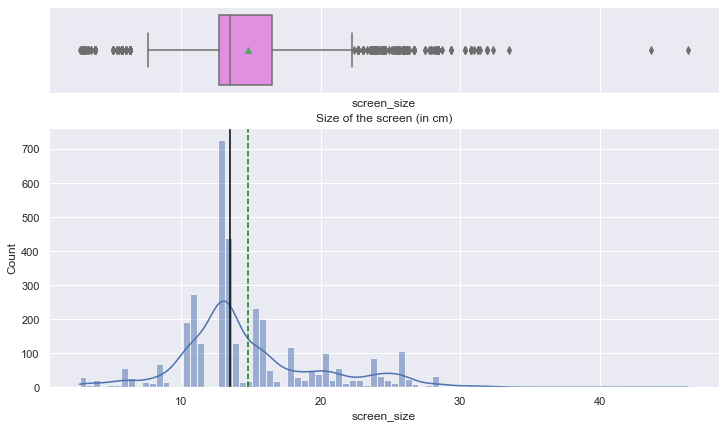

In [8]:
# plot histogram and boxplot of screen size
histogram_boxplot(df, 'screen_size')
plt.title('Size of the screen (in cm)')
plt.savefig('screen_hist_box.jpg', bbox_inches='tight')
plt.show()

### Observations
* positively skewed data
* many outliers in both directions, but much more in positive direction
* some of the outliers seem highly unlikely, due to error

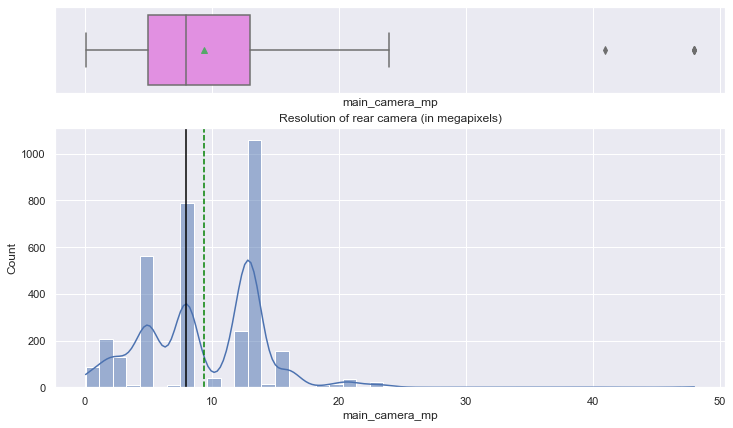

In [9]:
# plot histogram and boxplot of main camera
histogram_boxplot(df, 'main_camera_mp')
plt.title('Resolution of rear camera (in megapixels)')
plt.savefig('main_cam_hist_box.jpg', bbox_inches='tight')
plt.show()

### Observations
* positively skewed data
* few outliers in positive direction

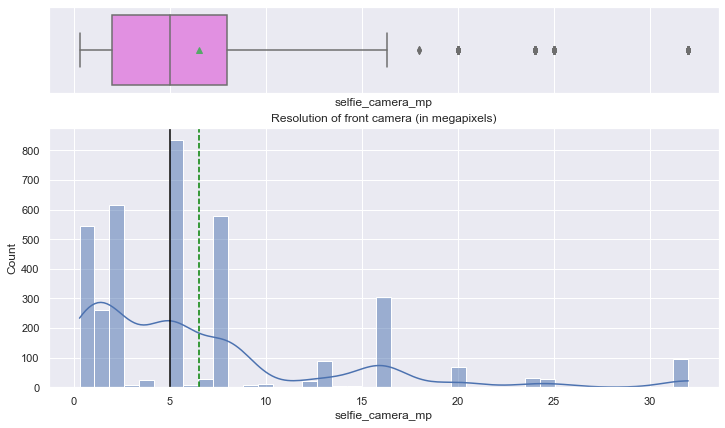

In [10]:
# plot histogram and boxplot of selfie camera
histogram_boxplot(df, 'selfie_camera_mp')
plt.title('Resolution of front camera (in megapixels)')
plt.savefig('selfie_cam_hist_box.jpg', bbox_inches='tight')
plt.show()

### Observations
* positively skewed data
* outliers in the positive direction

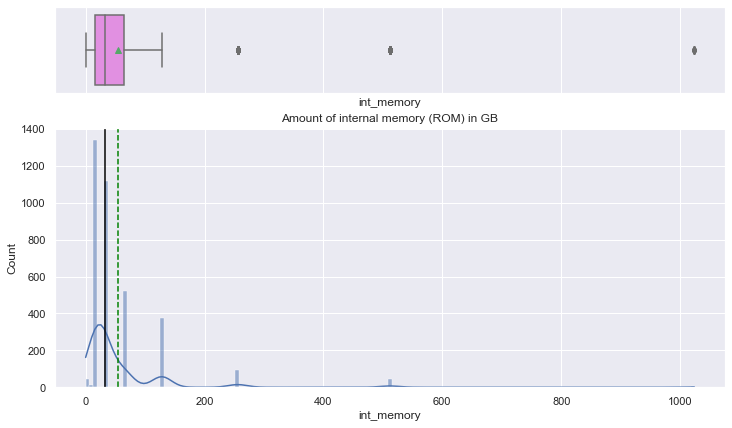

In [11]:
# plot histogram and boxplot of internal memory
histogram_boxplot(df, 'int_memory')
plt.title('Amount of internal memory (ROM) in GB')
plt.savefig('int_mem_hist_box.jpg', bbox_inches='tight')
plt.show()

### Observations
* positively skewed data
* outliers in positive direction

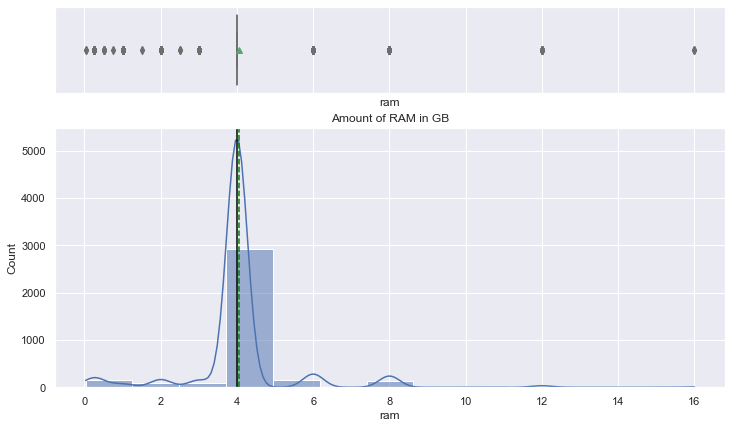

In [12]:
# plot histogram and boxplot of ram
histogram_boxplot(df, 'ram')
plt.title('Amount of RAM in GB')
plt.savefig('ram_hist_box.jpg', bbox_inches='tight')
plt.show()

### Observations
* positively skewed data
* outliers in both directions
* most of the data has 4 GB of RAM
* some extreme outliers

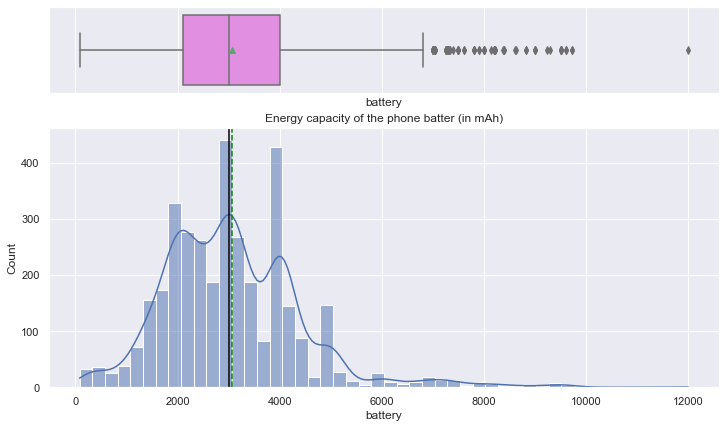

In [13]:
# plot histogram and boxplot of battery
histogram_boxplot(df, 'battery')
plt.title('Energy capacity of the phone batter (in mAh)')
plt.savefig('battery_hist_box.jpg', bbox_inches='tight')
plt.show()

### Observations
* positively skewed data
* outliers in the positive direction

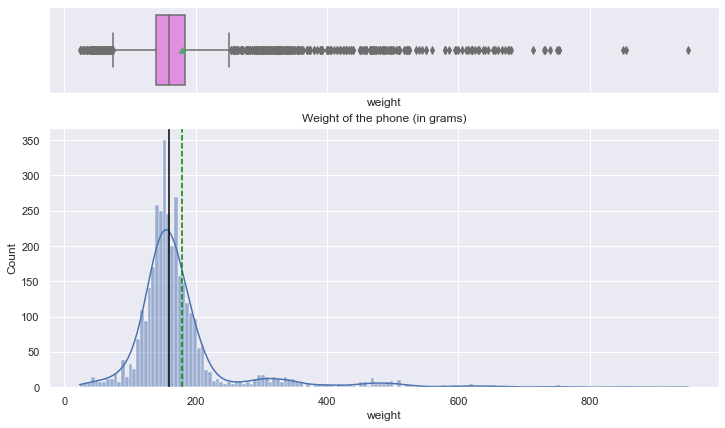

In [14]:
# plot histogram and boxplot of weight
histogram_boxplot(df, 'weight')
plt.title('Weight of the phone (in grams)')
plt.savefig('weight_hist_box.jpg', bbox_inches='tight')
plt.show()

### Observations
* Positively skewed data
* Outliers in both directions
* Extreme outliers in positive direction, but appear to possibly be due to error
* If not considering outliers, data appears approximately normal

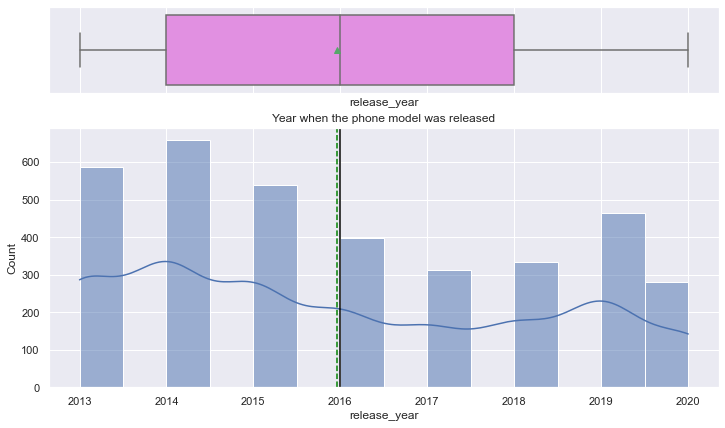

In [15]:
# plot histogram and boxplot of release year
histogram_boxplot(df, 'release_year')
plt.title('Year when the phone model was released')
plt.savefig('release_hist_box.jpg', bbox_inches='tight')

### Observations
* Data has a bimodal appearance
* Slightly negative skew

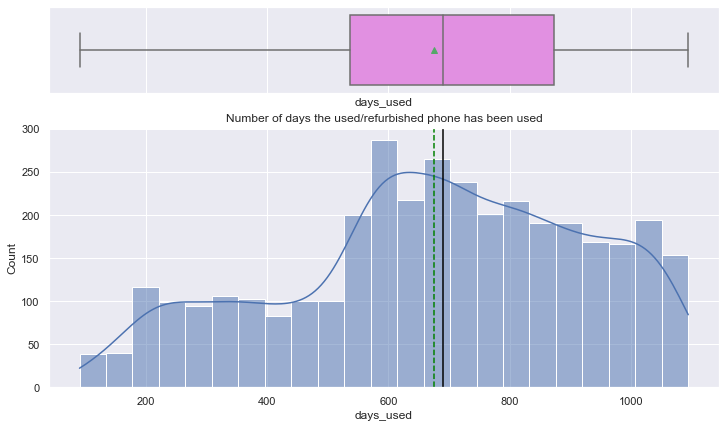

In [16]:
# plot histogram and boxplot of days used
histogram_boxplot(df, 'days_used')
plt.title('Number of days the used/refurbished phone has been used')
plt.savefig('days_hist_box.jpg', bbox_inches='tight')

### Observations
* Data has a slight negative skew

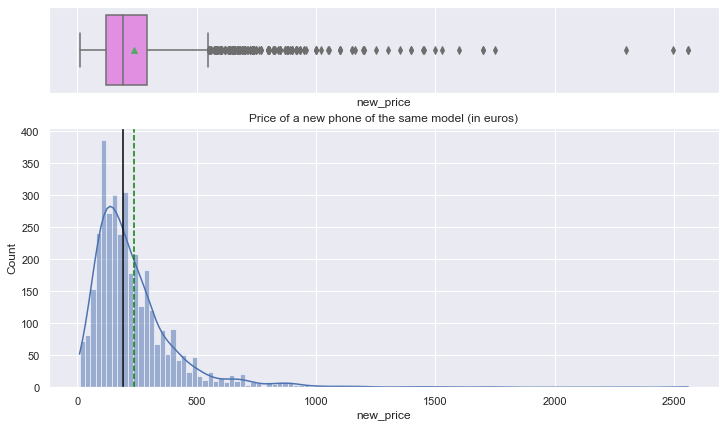

In [17]:
# plot histogram and boxplot of new price
histogram_boxplot(df, 'new_price')
plt.title('Price of a new phone of the same model (in euros)')
plt.savefig('new_price_hist_box.jpg', bbox_inches='tight')

### Observations
* Data is positively skewed
* Outliers in the positive direction
* Some extreme outliers

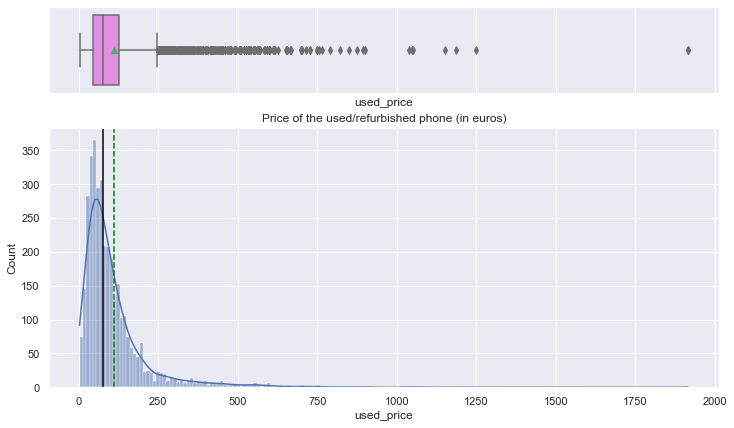

In [18]:
# plot histogram and boxplot of used price
histogram_boxplot(df, 'used_price')
plt.title('Price of the used/refurbished phone (in euros)')
plt.savefig('used_price_hist_box.jpg', bbox_inches='tight')

### Observations
* Positively skewed data
* Outliers in positive direction
* Few extreme outliers

In [13]:
# change object types to category
cat_vars = ['brand_name', 'os', '4g', '5g']

for colname in cat_vars:
    df[colname] = df[colname].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


### Explore Categorical Variables

In [20]:
# function to create labeled barplots provided by Great Learning


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=((count + 1)*2, 5))
    else:
        plt.figure(figsize=((n + 1)*2, 5))

    plt.xticks(rotation=45, fontsize=15)
    
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="hls",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

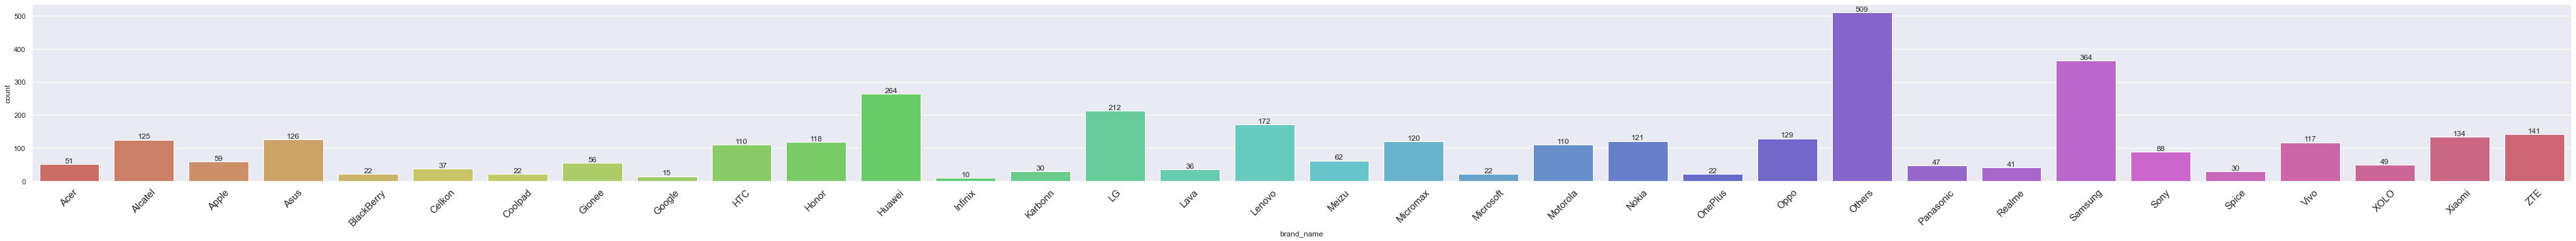

In [21]:
# plot labeled barplot of brand name
labeled_barplot(df, 'brand_name')

In [22]:
# define horizontal labeled barplot
def horiz_labeled_barplot(data, feature, n=None):
    """
    Horizontal barplot with count and percentage in the bar/on the side
    data: dataframe
    feature: dataframe column
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    
    total=len(data[feature]) # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count*0.6,(count*0.4)))
    else:
        plt.figure(figsize=(n*0.6,(n*0.4)))
    
    ax = sns.countplot(
        data=data,
        y=feature,
        palette='hls',
        order=data[feature].value_counts().index[:n].sort_values(),
    )  

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        label = '{:1.0f} |  {:.2f}%'.format(width, 100*width/total)
        x = width
        y = p.get_y() + height / 2
    
        ax.annotate(
            label,
            (x, y),
            ha = 'left',
            va = 'center',
            size = 9,
            )

    plt.show() # show the plot

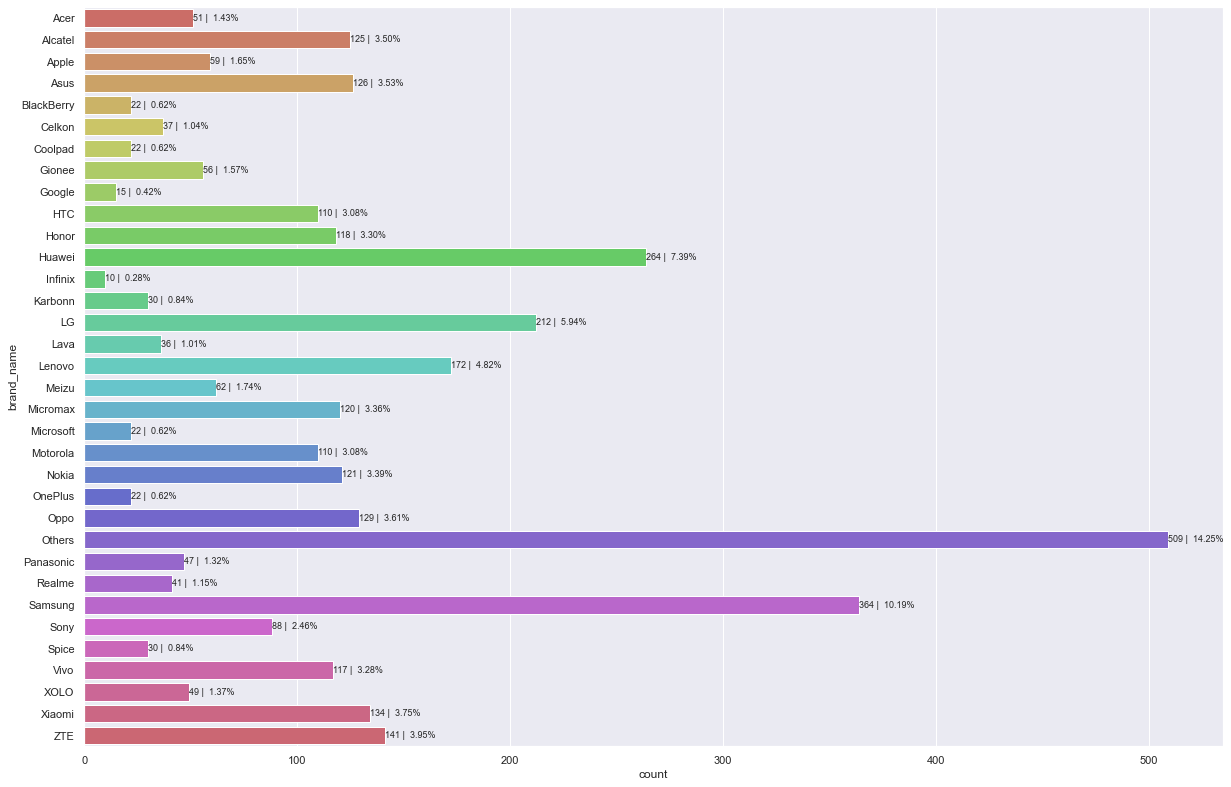

In [23]:
# horizontal labeled barplot of brand name
horiz_labeled_barplot(df, 'brand_name')

### Observations
* Samsung is the most popular phone, followed by Huawei and then LG

## Group Brand Names
* For the purpose of this study, we will group brands by the mean price of their entire line of phones:
    * basic
    * midrange
    * luxury

In [14]:
# calculate each brand name's mean price
price_mean = df.groupby('brand_name')['new_price'].mean().sort_values(ascending=False)
price_mean

brand_name
Apple         639.004941
OnePlus       558.230818
Google        474.716667
Oppo          341.912481
Huawei        323.960091
Vivo          320.268355
Samsung       293.854500
Sony          280.829676
Meizu         269.569242
Xiaomi        257.326422
Gionee        255.379286
Asus          250.998766
HTC           249.853818
LG            242.218203
Honor         235.897915
BlackBerry    234.774545
ZTE           216.800922
Motorola      209.448464
Coolpad       194.285455
Lenovo        193.358779
Others        191.112094
Realme        186.031415
Acer          172.867647
Panasonic     171.426596
Microsoft     166.366818
Alcatel       142.499092
XOLO          130.898571
Nokia         130.600802
Karbonn       110.384333
Lava          107.424722
Micromax      106.964667
Infinix       106.017000
Spice          98.000000
Celkon         60.956486
Name: new_price, dtype: float64

In [15]:
# calculate 0.33 quantile
quant1 = round(price_mean.quantile(0.33),0)
quant1

173.0

In [16]:
# calculate 0.67 quantile
quant2 = round(price_mean.quantile(0.67),0)
quant2

251.0

In [17]:
def group_by_brand(brand):
    """This function groups a brand name by the mean price of all the phones 
    it has available in this dataset.
    basic for mean < 172 euros
    midrange for 172 euros <= mean <= 240 euros
    luxury for mean < 240 euros"""
    if df[df['brand_name']==brand]['new_price'].mean() < quant1:
        brand_group = 'basic' # basic group for below 0.33 quantile
    elif df[df['brand_name']==brand]['new_price'].mean() <= quant2:
        brand_group = 'midrange' # midrange group for between 0.33 and 0.67 quantiles
    else:
        brand_group = 'luxury' # luxury group for above 0.67 quantile
    return brand_group

In [18]:
# create brand_group column as a category type
df['brand_group'] = df['brand_name'].apply(group_by_brand).astype('category')

In [29]:
# look at data
df.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,brand_group
2552,Samsung,Android,10.16,no,no,5.0,0.3,32.0,4.0,1500.0,123.0,2016,1010,87.820,26.41,luxury
1377,Huawei,Android,13.02,yes,no,12.0,8.0,64.0,4.0,3000.0,146.0,2017,745,231.980,92.74,luxury
2829,Sony,Android,10.95,yes,no,5.0,0.3,16.0,4.0,2330.0,143.8,2014,879,169.130,50.54,luxury
1661,Lenovo,Android,25.56,no,no,5.0,2.0,16.0,4.0,6340.0,550.0,2014,898,189.210,56.73,midrange
714,Others,Android,23.97,yes,no,8.0,5.0,32.0,4.0,2800.0,150.0,2019,499,100.020,50.04,midrange
3310,Honor,Android,24.61,yes,no,13.0,16.0,128.0,8.0,4000.0,202.0,2019,470,254.048,127.03,midrange
425,Alcatel,Android,20.32,no,no,0.3,0.3,16.0,0.5,3240.0,325.0,2014,1050,99.570,29.88,basic
499,Alcatel,Android,13.49,yes,no,16.0,8.0,32.0,4.0,4000.0,164.0,2017,839,189.710,56.91,basic
2750,Samsung,Others,3.81,no,no,5.0,1.3,16.0,4.0,1000.0,74.5,2013,1011,30.830,9.46,luxury
3348,Motorola,Android,15.72,yes,no,13.0,25.0,64.0,4.0,4000.0,188.0,2019,205,169.915,128.79,midrange


In [30]:
# Check unique brand names in basic group
df[df['brand_group']=='basic']['brand_name'].unique()

['Infinix', 'Lava', 'Micromax', 'Nokia', 'Acer', ..., 'Karbonn', 'Microsoft', 'Panasonic', 'Spice', 'XOLO']
Length: 12
Categories (12, object): ['Infinix', 'Lava', 'Micromax', 'Nokia', ..., 'Microsoft', 'Panasonic', 'Spice', 'XOLO']

In [31]:
# Check unique brand names in midrange group
df[df['brand_group']=='midrange']['brand_name'].unique()

['Honor', 'Others', 'HTC', 'Lenovo', 'LG', ..., 'Realme', 'ZTE', 'Asus', 'Coolpad', 'BlackBerry']
Length: 11
Categories (11, object): ['Honor', 'Others', 'HTC', 'Lenovo', ..., 'ZTE', 'Asus', 'Coolpad', 'BlackBerry']

In [32]:
# Check unique brand names in luxury group
df[df['brand_group']=='luxury']['brand_name'].unique()

['Huawei', 'Meizu', 'OnePlus', 'Oppo', 'Samsung', ..., 'Xiaomi', 'Apple', 'Gionee', 'Google', 'Sony']
Length: 11
Categories (11, object): ['Huawei', 'Meizu', 'OnePlus', 'Oppo', ..., 'Apple', 'Gionee', 'Google', 'Sony']

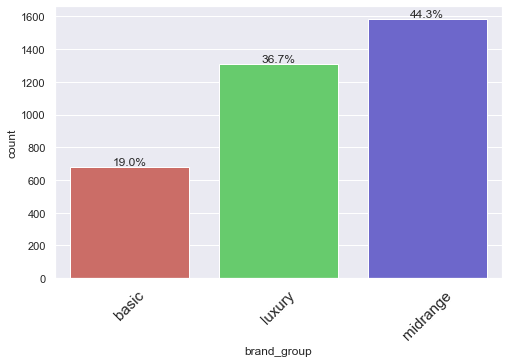

In [33]:
# plot labeled barplot of brand_group
labeled_barplot(df, 'brand_group', perc=True)

### Observations
* Approximately 17.6% phones are basic brands (12 brand names)
* Approximately 42.7% phones are midrange brands (11 brand names)
* Approximately 39.8% phones are luxury brands (11 brand names)

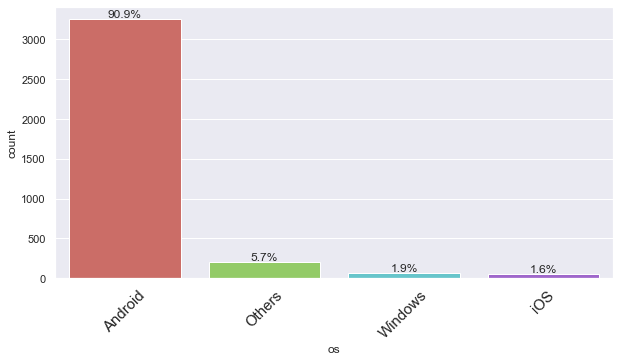

In [34]:
# plot labeled barplot of os
labeled_barplot(df, 'os', perc=True)

### Observations
* 90.9% of the used phone market is dominated by Android devices
* iOS is the least popular of the used phone market

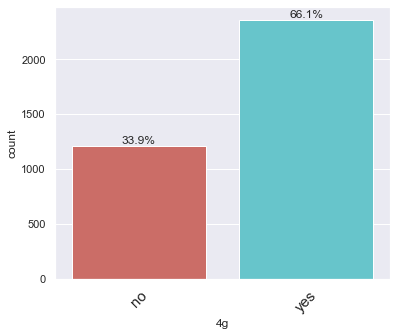

In [35]:
# plot labeled barbplot of 4g
labeled_barplot(df, '4g', perc=True)

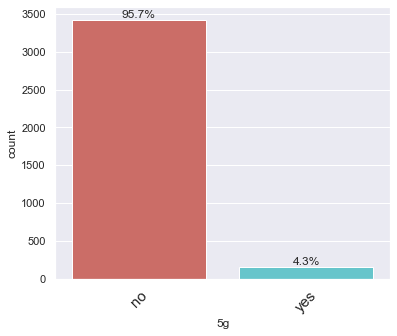

In [36]:
# plot labeled barplot of 5g
labeled_barplot(df, '5g', perc=True)

### Observations
* Almost two-thirds of the used phones have 4G available fewer than 5% have 5G available.

## Data Preprocessing

In [37]:
# check for duplicate rows
df.duplicated().sum()

0

There are no duplicate rows

### Missing Value Treatment

In [38]:
# check for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
brand_group           0
dtype: int64

* Target variable (*used_price*) has no missing values so we do not need to drop values.
* Predictor variables with missing values are all numerical variables so we will replace missing values in each column with its median.

In [19]:
# define lambda function to fill missing values
medianFiller = lambda x: x.fillna(x.median())

# select numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# apply lambda function to fill missing values
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

In [20]:
# check the number of missing values
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
brand_group         0
dtype: int64

* All the missing values have been treated.

In [41]:
# look at descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571.0,NaN,NaN,NaN,9.329863,4.705341,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3571.0,NaN,NaN,NaN,6.546486,6.877529,0.3,2.0,5.0,8.0,32.0
int_memory,3571.0,NaN,NaN,NaN,54.469509,84.585924,0.005,16.0,32.0,64.0,1024.0
ram,3571.0,NaN,NaN,NaN,4.056802,1.389897,0.03,4.0,4.0,4.0,16.0
battery,3571.0,NaN,NaN,NaN,3067.112714,1363.062572,80.0,2100.0,3000.0,4000.0,12000.0


# Observations
* There are 33 brand names listed by name and the rest are "others"
* Android is the most popular operating system
* Most phones have 4G available, but an overwhelming majority do not have 5g available
* Many numerical variables have extreme outliers, mainly in the positive direction
* Median used phone price is 75.53 euros, not even half of median new price
* Midrange group has the most phones

In [42]:
# look at value counts for selfie camera mp
df['selfie_camera_mp'].value_counts().sort_values(ascending=False)

5.00     827
8.00     577
2.00     557
0.30     508
16.00    305
1.30     153
32.00     94
13.00     90
20.00     68
1.20      47
1.60      38
2.10      37
1.00      34
24.00     30
7.00      29
25.00     28
12.00     21
4.00      20
1.25      18
1.90      12
2.20      11
10.00     10
5.10       9
6.00       8
3.00       7
9.00       7
14.50      5
1.10       5
3.70       3
14.00      3
10.50      2
18.00      2
0.65       2
1.80       1
3.50       1
16.30      1
0.90       1
Name: selfie_camera_mp, dtype: int64

In [43]:
# look at value counts for main camera mp
df['main_camera_mp'].value_counts().sort_values(ascending=False)

13.00    1052
8.00      960
5.00      561
12.00     212
2.00      176
16.00     155
3.15      123
0.30       85
10.50      34
1.30       27
21.00      19
23.00      19
20.70      16
20.00      13
14.50      13
12.20      12
4.00       10
12.30       9
8.10        9
19.00       8
13.10       6
10.00       6
3.00        5
24.00       5
12.50       5
6.50        4
48.00       4
6.70        4
0.08        3
21.20       2
16.30       1
21.50       1
20.20       1
1.00        1
22.60       1
22.50       1
1.90        1
41.00       1
1.20        1
20.10       1
12.60       1
12.65       1
2.10        1
18.00       1
Name: main_camera_mp, dtype: int64

### Observation
* There are many distinct values for selfie/main camera mp. Bin *main_camera_mp* and *selfie_camera_mp* as this may make visualization more clear

In [21]:
# bin main camera mp
df['binned_main_cam_mp'] = pd.cut(df['main_camera_mp'], 
                            [-np.inf, 2, 8, 12, np.inf],
                           labels = ['poor', 'good', 'great', 'excellent'])

In [22]:
# look at value counts for binned main camera
df['binned_main_cam_mp'].value_counts(dropna=False)

good         1668
excellent    1348
poor          294
great         261
Name: binned_main_cam_mp, dtype: int64

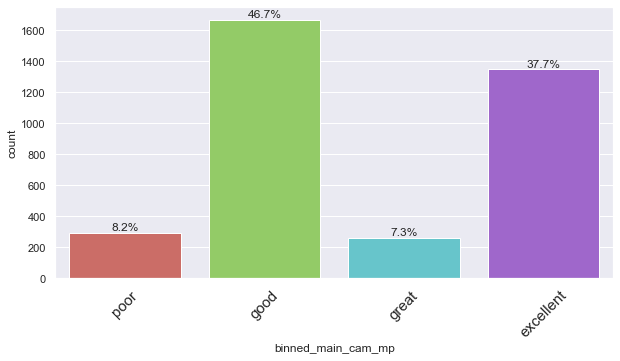

In [46]:
# plot labeled barplot of binned main camera
labeled_barplot(df,'binned_main_cam_mp', perc=True)

In [23]:
# bin selfie camera mp
df['binned_selfie_cam_mp'] = pd.cut(df['selfie_camera_mp'],
                              [-np.inf, 2, 8, 12, np.inf],
                             labels = ['poor', 'good', 'great', 'excellent'])

In [24]:
# look at value counts for binned selfie camera
df['binned_selfie_cam_mp'].value_counts(dropna=False)

good         1529
poor         1376
excellent     626
great          40
Name: binned_selfie_cam_mp, dtype: int64

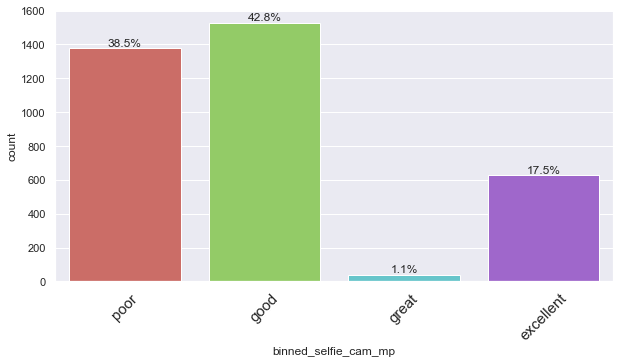

In [49]:
# plot labeled barplot for binned selfie camera
labeled_barplot(df, 'binned_selfie_cam_mp', perc=True)

## Bivariate Scatterplots

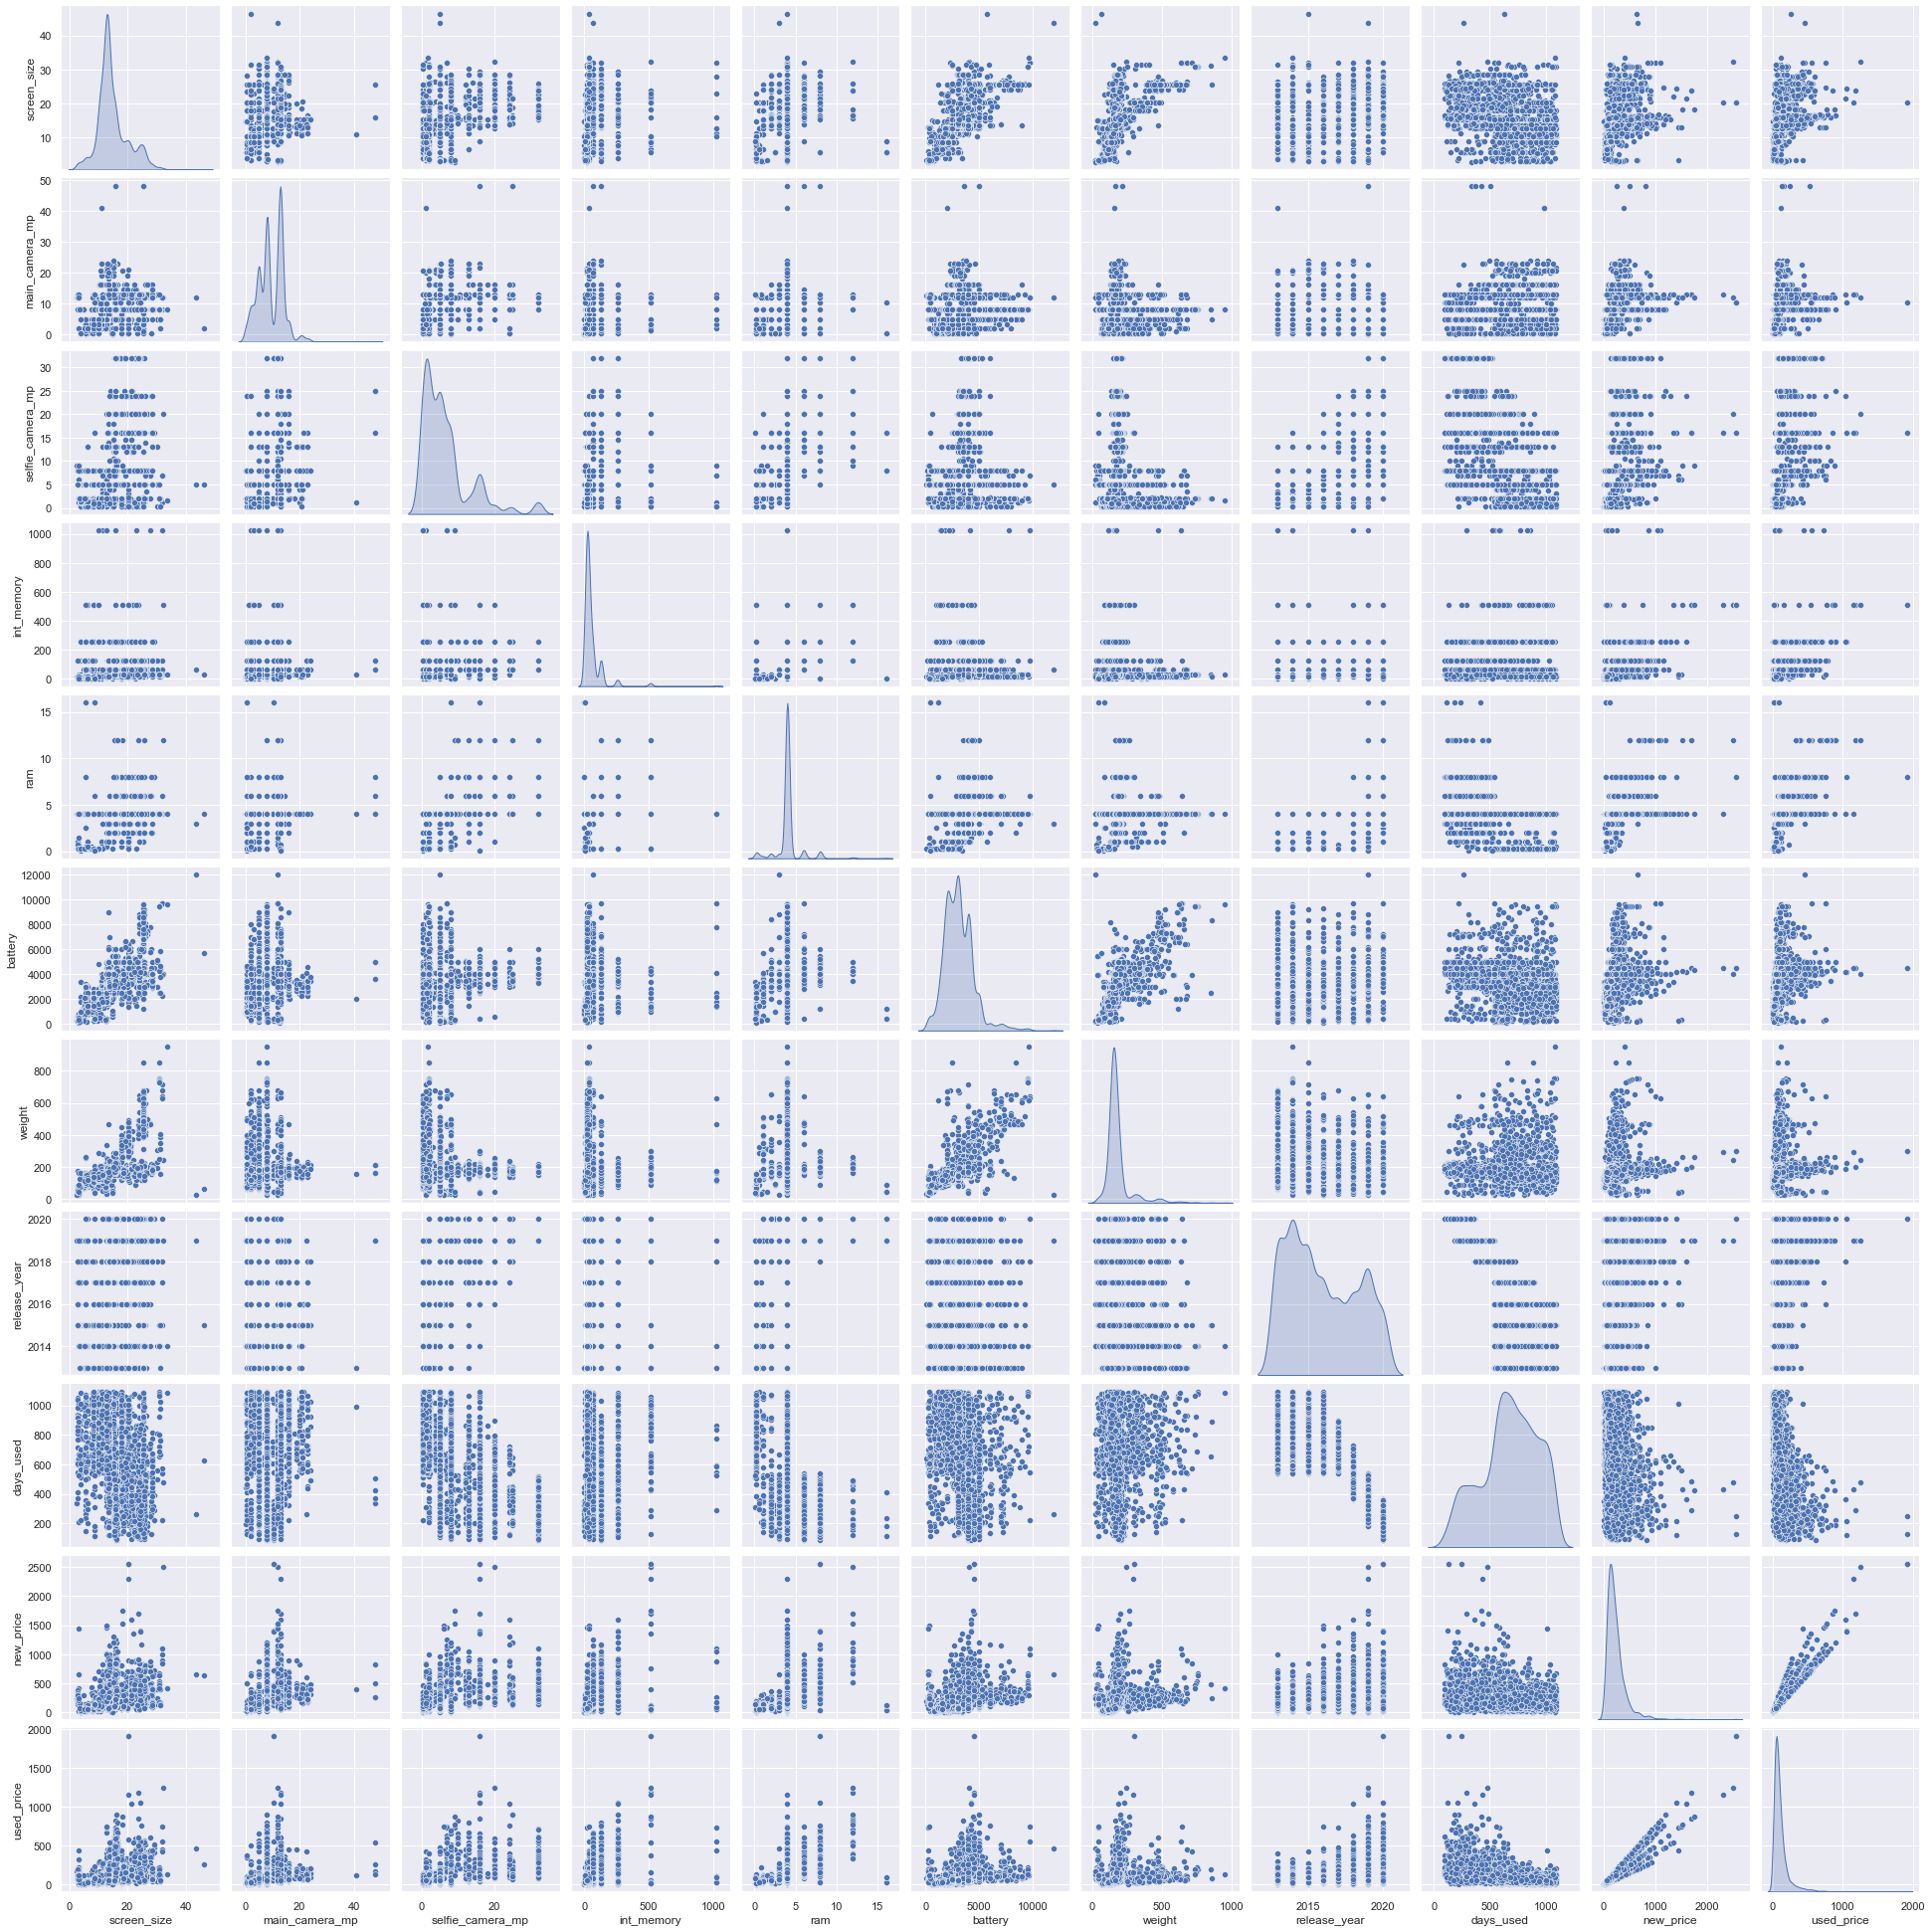

In [50]:
# get overall picture of numerical variables
sns.pairplot(data=df[numeric_columns], diag_kind='kde')
plt.show()

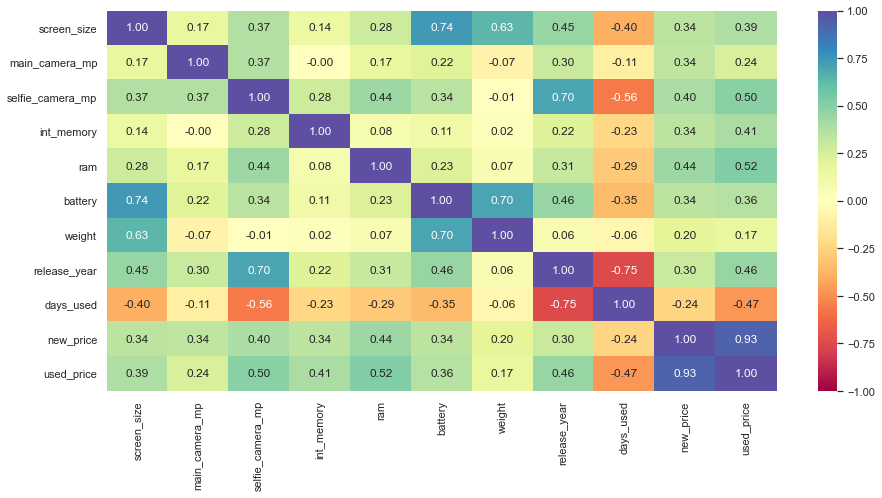

In [51]:
# correlation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral',)
plt.show()

### Observations
* new price and used price have very strong, positive correlation, which indicates as new price increases, used price also increases
* ram, selfie camera mp, and release year have moderate positive correlation with used price, which means as ram, selfie camera mp, and release year increase, used price also increases
* days used has moderate negative correlation with used price, and is the only variable with negative correlation with price variables, which means as days used increases, used price decreases

**Let's look at graphs with multiple variables with moderate to high correlation with used_price**

Text(0, 0.5, 'Used Price (euros)')

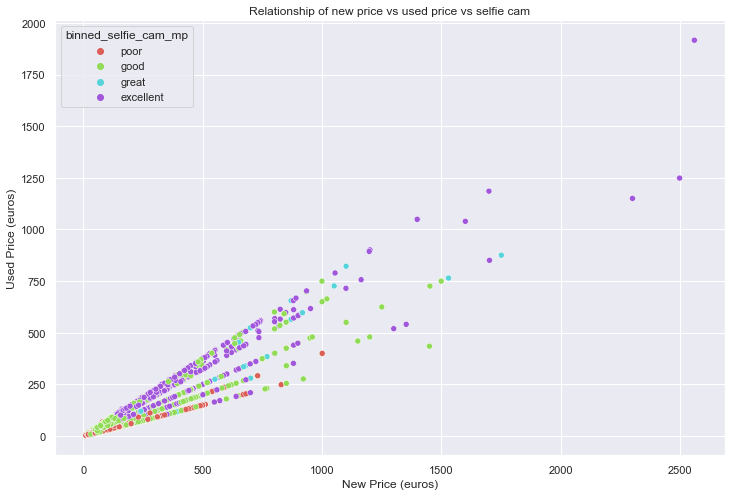

In [52]:
# plot new price, used price, selfie cam
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='new_price', y='used_price', hue='binned_selfie_cam_mp', palette='hls')
plt.title('Relationship of new price vs used price vs selfie cam')
plt.xlabel('New Price (euros)')
plt.ylabel('Used Price (euros)')

Text(0, 0.5, 'Used Price (euros)')

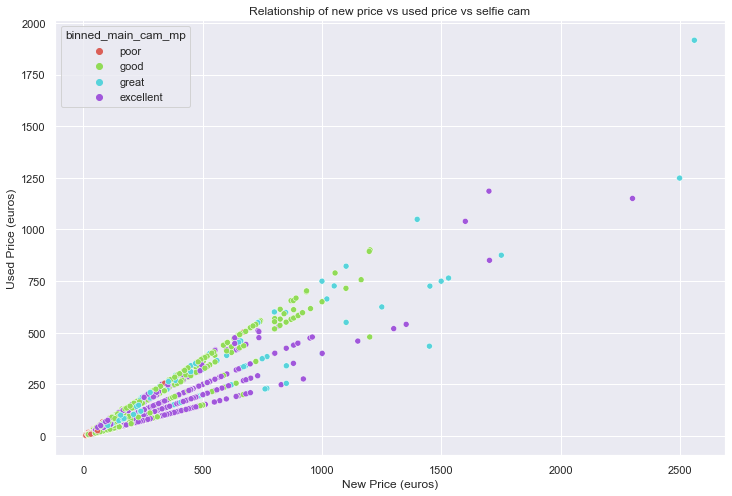

In [53]:
# plot new price, used price, main cam
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='new_price', y='used_price', hue='binned_main_cam_mp', palette='hls')
plt.title('Relationship of new price vs used price vs selfie cam')
plt.xlabel('New Price (euros)')
plt.ylabel('Used Price (euros)')

Text(25.875383333333325, 0.5, 'Used Price (euros)')

<Figure size 864x576 with 0 Axes>

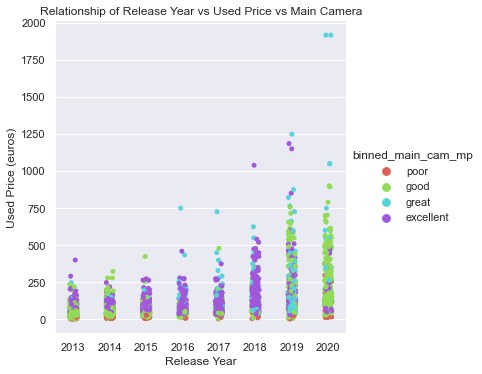

In [54]:
# plot main cam, used price, release year
plt.figure(figsize=(12,8))
sns.catplot(data=df, x='release_year', y='used_price', hue='binned_main_cam_mp', palette='hls')
plt.title('Relationship of Release Year vs Used Price vs Main Camera')
plt.xlabel('Release Year')
plt.ylabel('Used Price (euros)')

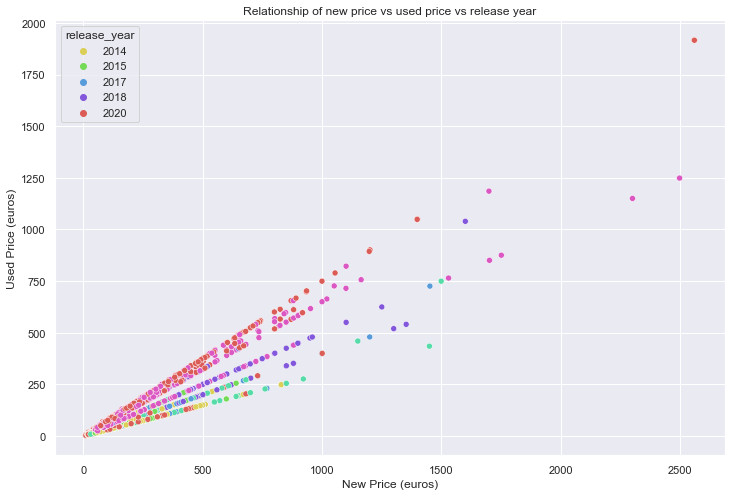

In [55]:
# plot new price, used price, release year
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='new_price', y='used_price', hue='release_year', palette='hls')
plt.title('Relationship of new price vs used price vs release year')
plt.xlabel('New Price (euros)')
plt.ylabel('Used Price (euros)')
plt.savefig('price_year_scatter.jpg', bbox_inches='tight')

Text(0, 0.5, 'Used Price (euros)')

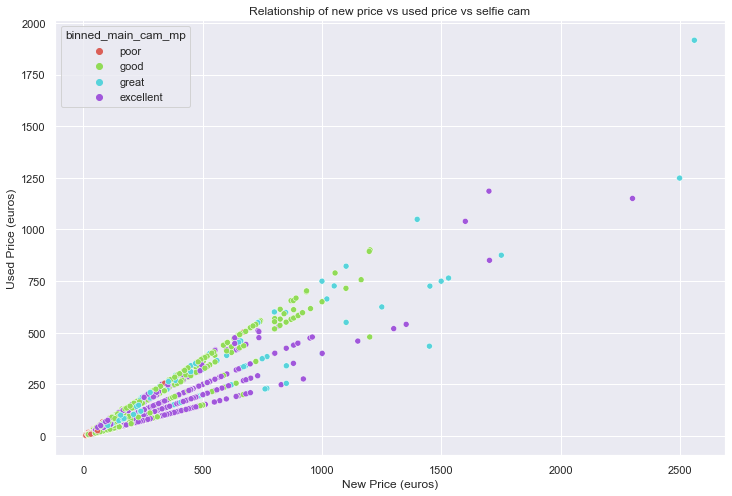

In [56]:
# plot new price, used price, main cam
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='new_price', y='used_price', hue='binned_main_cam_mp', palette='hls')
plt.title('Relationship of new price vs used price vs selfie cam')
plt.xlabel('New Price (euros)')
plt.ylabel('Used Price (euros)')

### Observations
* Strong positive correlation between new and used prices
* better selfie cameras have higher used price
* better main cameras often have slightly lower used price
* newer phones have higher used prices than older phones with the same new price

Text(19.1738, 0.5, 'used price (euros)')

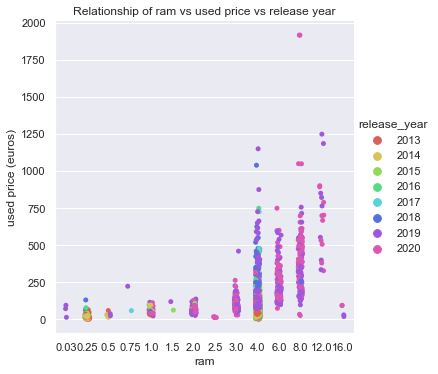

In [57]:
# plot ram, year, used price
sns.catplot(data=df, x='ram', y='used_price', hue='release_year', palette='hls')
plt.title('Relationship of ram vs used price vs release year')
plt.xlabel('ram')
plt.ylabel('used price (euros)')

### Observations
* The majority of data points are at 4 GB ram
* Older phones tend to have less ram

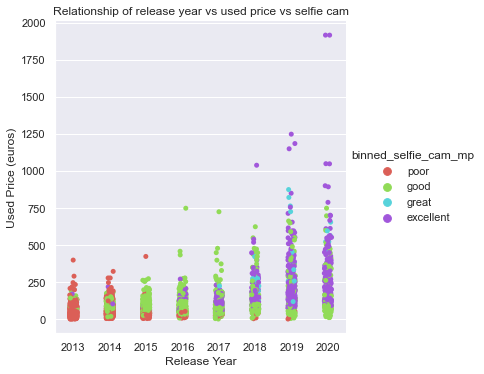

In [58]:
# plot binned selfie camera, year, used price
sns.catplot(data=df, hue='binned_selfie_cam_mp', y='used_price', x='release_year', palette='hls')
plt.title('Relationship of release year vs used price vs selfie cam')
plt.xlabel('Release Year')
plt.ylabel('Used Price (euros)')
plt.savefig('year_used_price_selfie.jpg', bbox_inches='tight')
plt.show()

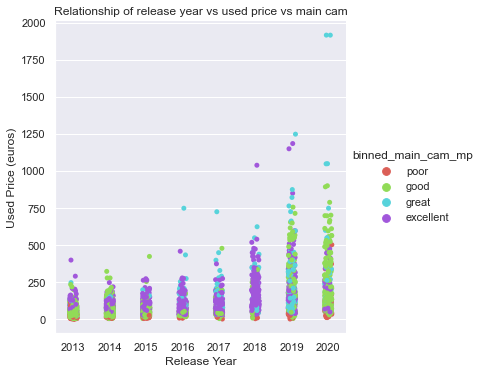

In [59]:
# plot year, main camera, used_price
sns.catplot(data=df, hue='binned_main_cam_mp', y='used_price', x='release_year', palette='hls')
plt.title('Relationship of release year vs used price vs main cam')
plt.xlabel('Release Year')
plt.ylabel('Used Price (euros)')
plt.show()

### Observations
* Older phones tend to have lower quality selfie cameras
* For each release year, better quality selfie cameras result in higher used price
* As years progress, main camera mp begins to increase, and then slightly decrease

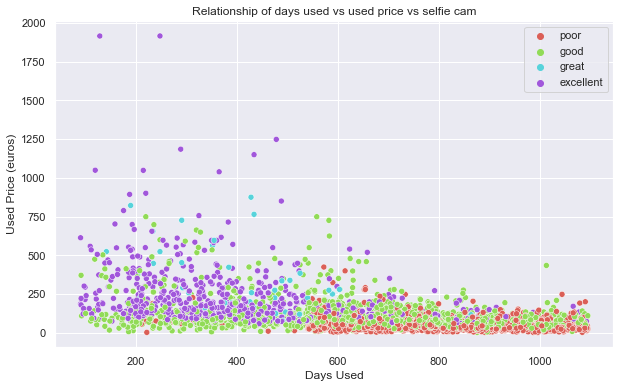

In [60]:
# plot days_used, selfie camera, used_price
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, hue='binned_selfie_cam_mp', y='used_price', 
                x='days_used', palette='hls')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Relationship of days used vs used price vs selfie cam')
plt.xlabel('Days Used')
plt.ylabel('Used Price (euros)')
plt.savefig('days_selfie_used_price.jpg', bbox_inches='tight')
plt.show()

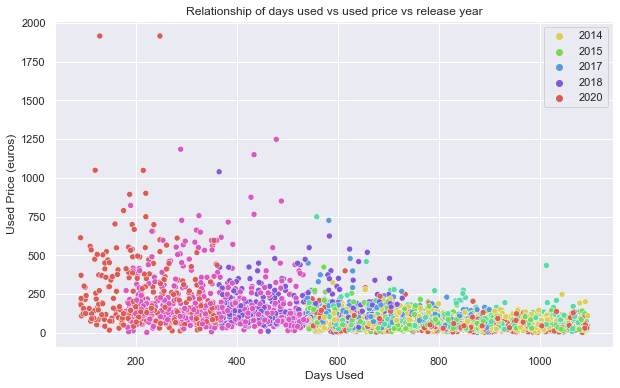

In [61]:
# plot days_used, release_year, used_price
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, hue='release_year', y='used_price', 
                x='days_used', palette='hls')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Relationship of days used vs used price vs release year')
plt.xlabel('Days Used')
plt.ylabel('Used Price (euros)')
plt.show()

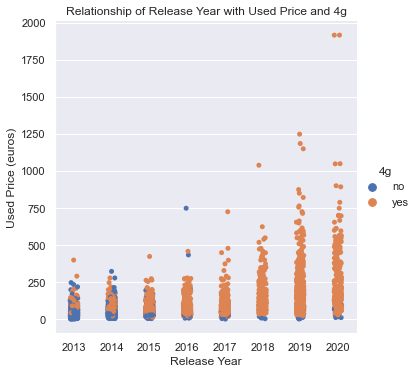

In [62]:
# plot 4g vs release_year vs used_price
sns.catplot(data=df, x='release_year', y='used_price', hue='4g')
plt.title('Relationship of Release Year with Used Price and 4g')
plt.xlabel('Release Year')
plt.ylabel('Used Price (euros)')
plt.savefig('4g_year_used_price.jpg', bbox_inches='tight')
plt.show()

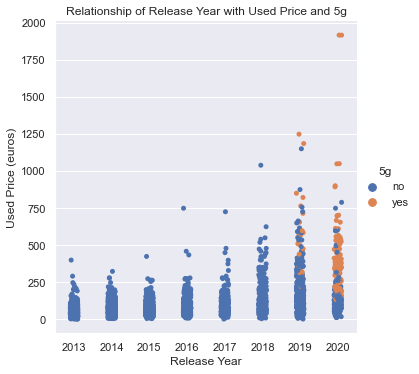

In [63]:
# plot 5g vs release_year vs used_price
sns.catplot(data=df, x='release_year', y='used_price', hue='5g')
plt.title('Relationship of Release Year with Used Price and 5g')
plt.xlabel('Release Year')
plt.ylabel('Used Price (euros)')
plt.savefig('5g_year_used_price.jpg', bbox_inches='tight')
plt.show()

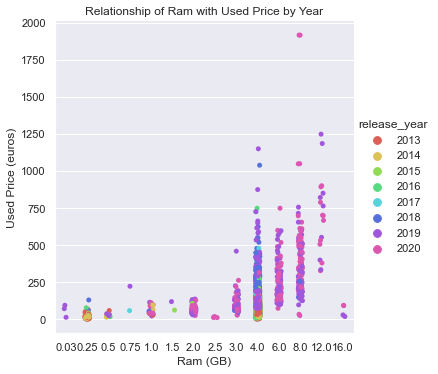

In [64]:
# plot release year vs ram vs used_price
sns.catplot(data=df, x='ram', y='used_price', hue='release_year', palette='hls')
plt.title('Relationship of Ram with Used Price by Year')
plt.xlabel('Ram (GB)')
plt.ylabel('Used Price (euros)')
plt.show()

### Observations
* newer phones are more likely to have 4g and more ram

<Figure size 1080x576 with 0 Axes>

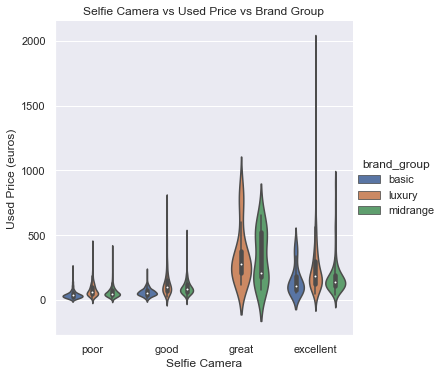

In [65]:
# plot brand_group vs binned selfie cam vs used_price
plt.figure(figsize=(15,8))
sns.catplot(data=df, x='binned_selfie_cam_mp', y='used_price', hue='brand_group', kind='violin')
plt.title('Selfie Camera vs Used Price vs Brand Group')
plt.xlabel('Selfie Camera')
plt.ylabel('Used Price (euros)')
plt.show()

<AxesSubplot:xlabel='ram', ylabel='brand_name'>

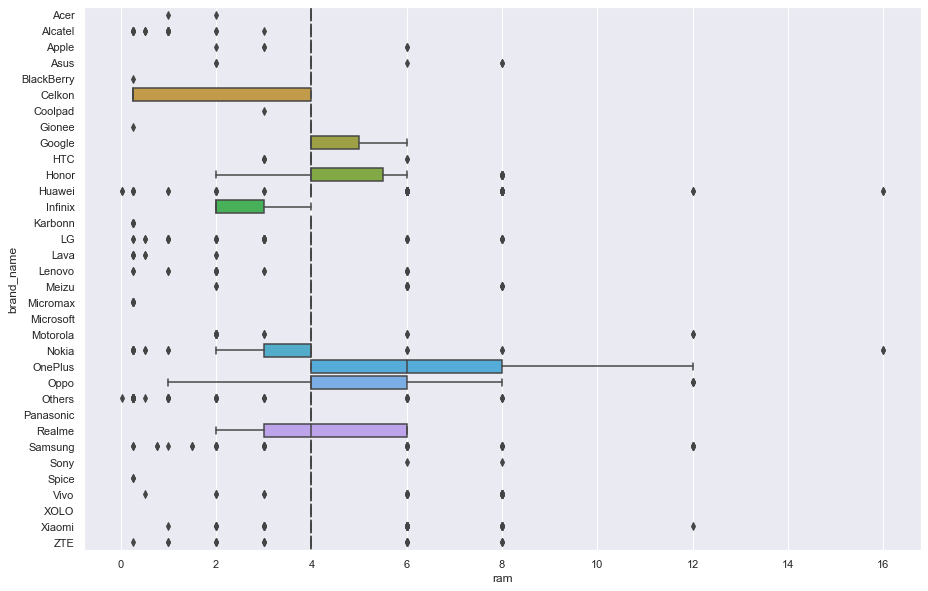

In [66]:
# plot boxplots of all brands' ram
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='ram', y='brand_name')

### Observations
* Nearly all brands have median of 4 GB ram
* Celkon has less than 0.5 GB
* Oneplus has median of 6 GB

## Multivariate Relationships

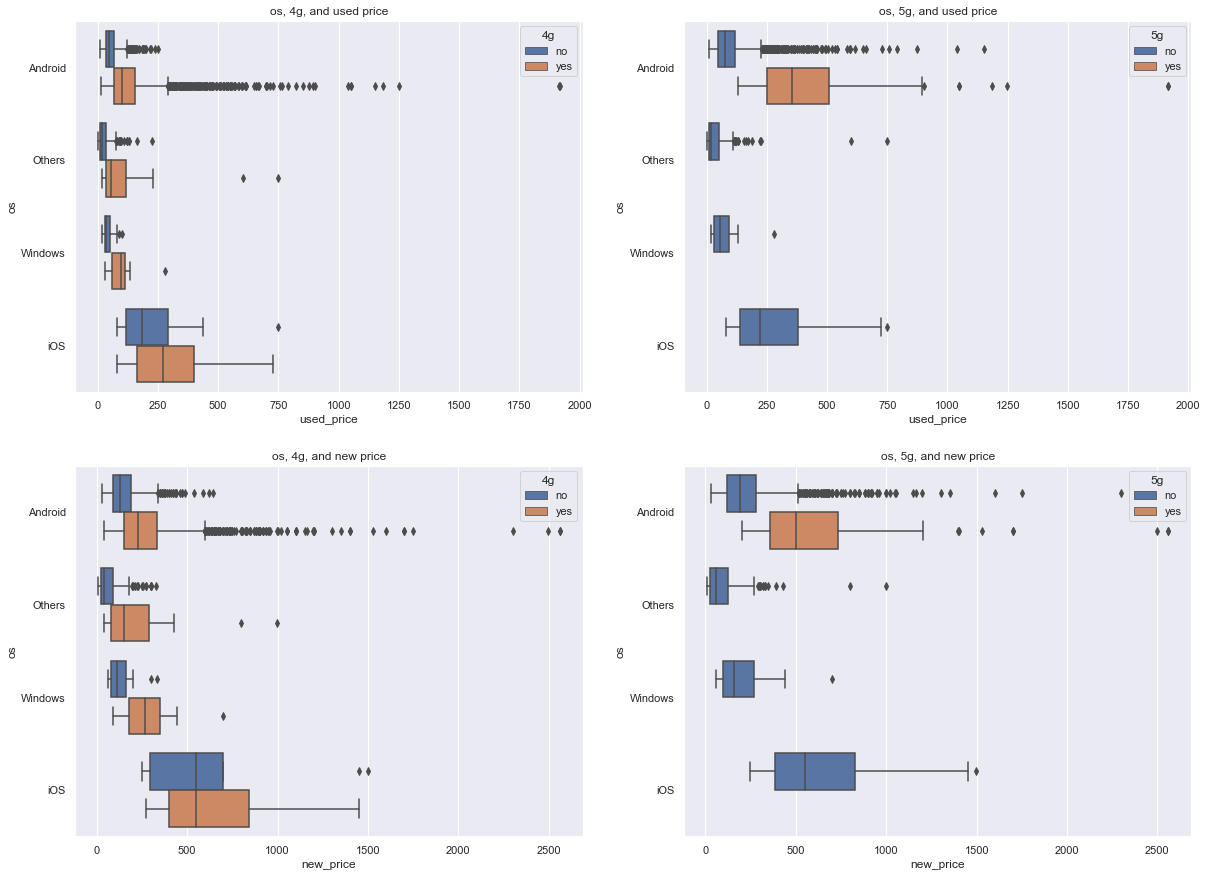

In [67]:
# plot relationship between os, 5g, and used price
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(data=df, y='os', x='used_price', hue='4g')
plt.title('os, 4g, and used price')

plt.subplot(2,2,2)
sns.boxplot(data=df, y='os', x='used_price', hue='5g')
plt.title('os, 5g, and used price')

plt.subplot(2,2,3)
sns.boxplot(data=df, y='os', x='new_price', hue='4g')
plt.title('os, 4g, and new price')

plt.subplot(2,2,4)
sns.boxplot(data=df, y='os', x='new_price', hue='5g')
plt.title('os, 5g, and new price')

plt.show()

### Observations
* phones with 4g and 5g sell for more than those without
* Android phones are the only phones that have a 5g option
* Android phones with 5g option sell for more than those that do not have the 5g option
* iOS phones sell for more than all other phones, even without 4g/5g
* Android phones sell for slightly more than Windows phones
* phones with 'other' are the least expensive phones, both new and used

### Answer questions
To thoroughly analyze the data, address additional questions posed in the Jupyter notebook template provided.
* A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
* Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
* Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

Text(0, 0.5, 'Weight (grams)')

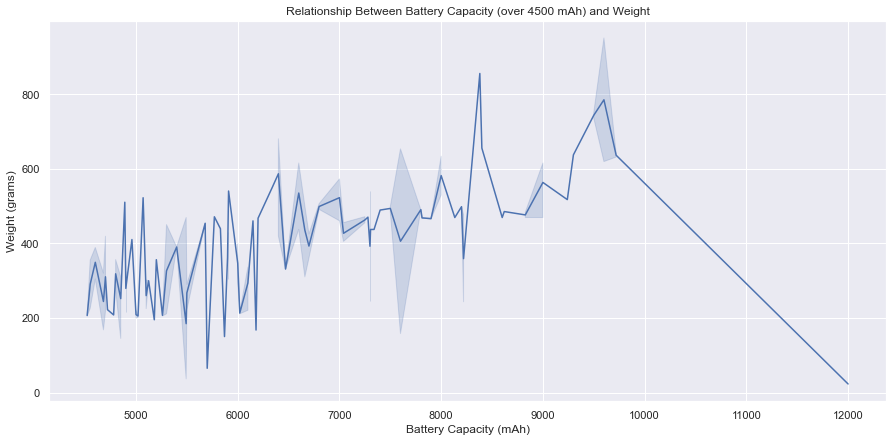

In [68]:
# plot relationship between battery and weight 
# for large battery capacity (greater than 4500 mAh)
plt.figure(figsize=(15,7))
sns.lineplot(data=df[df['battery']>4500], x='battery', y='weight')#, hue='brand_group')
plt.title('Relationship Between Battery Capacity (over 4500 mAh) and Weight')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (grams)')

In [69]:
# look at the info for the phone with largest battery capacity
df[df['battery']==12000]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,brand_group,binned_main_cam_mp,binned_selfie_cam_mp
387,Samsung,Android,43.66,yes,no,12.0,5.0,64.0,3.0,12000.0,23.0,2019,266,659.47,460.58,luxury,great,good


In [70]:
# define median weight
weight_median = df['weight'].median()
weight_median

159.0

In [71]:
# look at lightweight phones with large battery capacity
df[(df['battery']>4500) & (df['weight']<=weight_median)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,brand_group,binned_main_cam_mp,binned_selfie_cam_mp
158,Others,Android,16.35,yes,no,12.00,16.0,128.0,8.0,5000.0,159.0,2018,413,298.88,149.44,midrange,great,excellent
387,Samsung,Android,43.66,yes,no,12.00,5.0,64.0,3.0,12000.0,23.0,2019,266,659.47,460.58,luxury,great,good
441,Acer,Android,25.56,no,no,5.00,2.0,16.0,4.0,6100.0,147.5,2016,570,230.39,115.03,basic,good,poor
443,Acer,Android,13.49,yes,no,13.00,5.0,16.0,4.0,5000.0,147.5,2016,549,201.00,100.64,basic,excellent,good
671,Apple,iOS,14.92,yes,no,12.00,7.0,64.0,4.0,5493.0,48.0,2018,403,700.15,350.08,luxury,great,good
672,Apple,iOS,14.92,yes,no,12.00,7.0,64.0,4.0,5493.0,36.7,2018,573,430.46,215.27,luxury,great,good
1989,Micromax,Android,20.32,no,no,5.00,2.0,16.0,4.0,4800.0,118.0,2013,1032,171.39,51.35,basic,good,poor
2562,Samsung,Android,46.36,yes,no,2.10,5.0,32.0,4.0,5700.0,65.0,2015,627,639.87,255.73,luxury,good,good
2579,Samsung,Android,23.97,yes,no,8.00,2.1,32.0,4.0,5870.0,150.0,2015,913,399.41,119.94,luxury,good,good
2714,Samsung,Android,25.56,yes,no,8.00,2.0,16.0,4.0,8220.0,130.4,2013,971,370.77,111.15,luxury,good,poor


In [72]:
# count the number of lightweight phones with large battery capacity
len(df[(df['battery']>4500) & (df['weight']<=weight_median)])

12

### Observations
* As battery capacity increases, weight typically increases
* It is unlikely for the Samsung phone with largest battery capacity to be so light

In [73]:
# convert 6 inches to cm for large screen
large_screen = 6 * 2.54
print(large_screen)

15.24


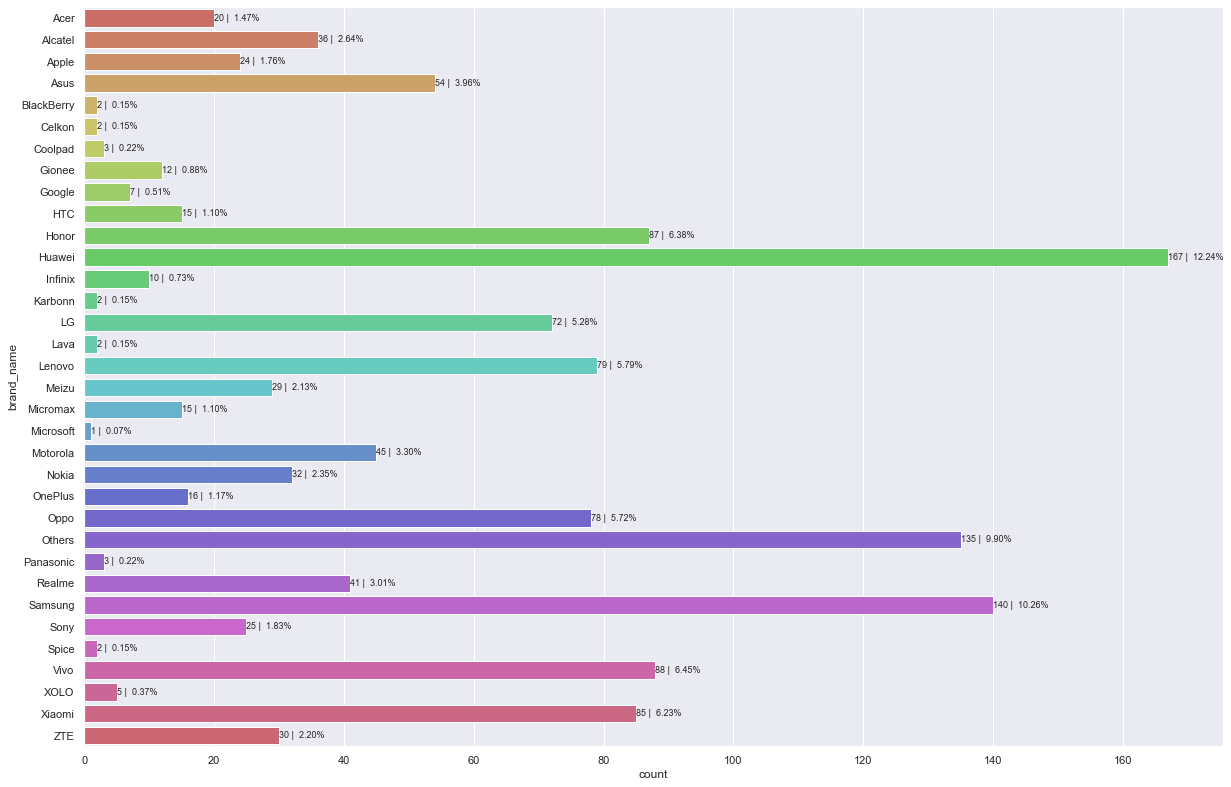

In [74]:
# plot horizontal label countplot of large screen phones
horiz_labeled_barplot(df[df['screen_size']>=large_screen], 'brand_name')

In [75]:
# determine proportion of large screen phones
df[df['screen_size']>=large_screen].size / df.size

0.381965835900308

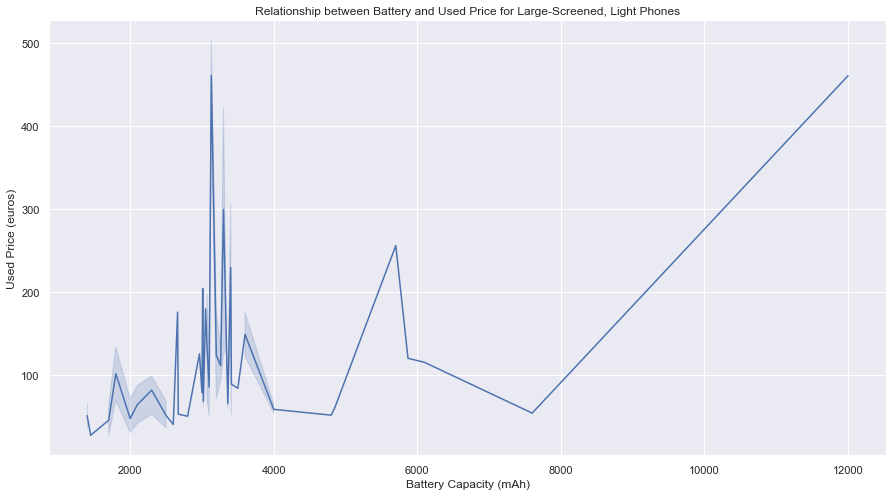

In [76]:
# plot battery capacity and used price for large screen, light weight phones
plt.figure(figsize=(15,8))
sns.lineplot(data=df[(df['screen_size']>=large_screen) & (df['weight']<weight_median)], 
             y='used_price', x='battery')
plt.title('Relationship between Battery and Used Price for Large-Screened, Light Phones')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Used Price (euros)')
plt.show()

### Observations
* ~38% of the phones in the dataset are large screen phones.
* Top two brands with large screen phones:
    - Huawei, 12.2%
    - Samsung, 10.3%
* The phones that are lightweight with large battery capacity also have large screen size.
* Some of the larger screen sizes do not seem plausible

In [77]:
# subset for basic brand group phones with great selfie camera
df_basic_selfie = df[(df['brand_group'] == 'basic') & (df['selfie_camera_mp']>8)]
df_basic_selfie.sample(n=5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,brand_group,binned_main_cam_mp,binned_selfie_cam_mp
2115,Nokia,Android,18.10,yes,no,8.0,20.0,64.0,4.0,3500.0,180.0,2018,485,399.10,199.61,basic,good,excellent
63,Infinix,Android,16.19,yes,no,8.0,16.0,32.0,3.0,4000.0,178.0,2019,316,99.70,64.51,basic,good,excellent
2119,Nokia,Android,13.97,yes,no,8.0,16.0,64.0,4.0,3060.0,151.0,2018,648,251.11,100.48,basic,good,excellent
288,Infinix,Android,16.19,yes,no,8.0,16.0,32.0,3.0,4000.0,178.0,2019,356,100.08,63.94,basic,good,excellent
2133,Nokia,Android,13.18,yes,no,13.0,13.0,128.0,4.0,3090.0,160.0,2017,558,330.84,165.39,basic,excellent,excellent


In [78]:
# determine which brand names are basic brand group with great selfie camera
df_basic_selfie['brand_name'].unique()

['Infinix', 'Nokia', 'Acer', 'Micromax', 'Panasonic']
Categories (5, object): ['Infinix', 'Nokia', 'Acer', 'Micromax', 'Panasonic']

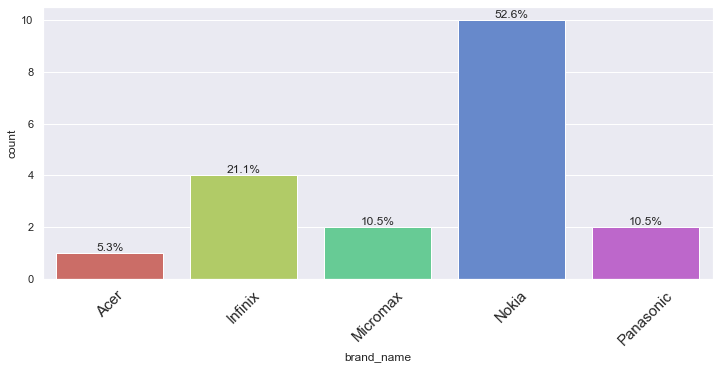

In [79]:
# plot barplot of brand names for basic brands with great selfie camera
labeled_barplot(df_basic_selfie, 'brand_name', perc=True, n=5)

In [80]:
# define budget price to be Q1 used price
budget_price = df['used_price'].quantile(0.25)
budget_price

45.205

In [81]:
# subset for budget phones with great selfie camera
df_budget_selfie = df[(df['used_price'] < budget_price) & (df['selfie_camera_mp']>8)]
df_budget_selfie

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,brand_group,binned_main_cam_mp,binned_selfie_cam_mp
1859,Meizu,Android,19.84,yes,no,13.0,13.0,32.0,4.0,3000.0,150.0,2018,635,109.98,44.06,luxury,excellent,excellent
3196,ZTE,Android,13.49,yes,no,13.0,16.0,64.0,4.0,3000.0,164.0,2017,879,118.94,35.74,midrange,excellent,excellent


In [82]:
# subset for phones below median price with great selfie camera
price_median = df['used_price'].median()
df_median_selfie = df[(df['used_price'] < price_median) & (df['selfie_camera_mp'] > 8)]
df_median_selfie.sample(n=5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,brand_group,binned_main_cam_mp,binned_selfie_cam_mp
202,Xiaomi,Others,8.73,no,no,8.0,16.0,64.0,6.0,420.0,208.0,2020,153,101.95,75.34,luxury,good,excellent
2804,Sony,Android,12.70,yes,no,23.0,13.0,32.0,4.0,2620.0,153.0,2016,818,199.00,59.73,luxury,excellent,excellent
3196,ZTE,Android,13.49,yes,no,13.0,16.0,64.0,4.0,3000.0,164.0,2017,879,118.94,35.74,midrange,excellent,excellent
317,LG,Android,19.37,yes,no,8.0,16.0,32.0,3.0,4000.0,175.0,2019,482,129.27,64.63,midrange,good,excellent
3213,ZTE,Android,13.02,yes,no,23.0,13.0,64.0,4.0,3000.0,158.0,2016,835,218.49,65.65,midrange,excellent,excellent


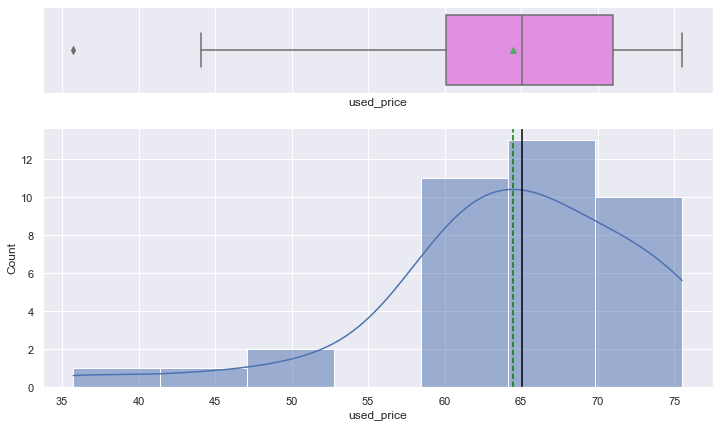

In [83]:
# plot histogram & boxplot for used price of phones below median price with great selfie camera
histogram_boxplot(df_median_selfie, 'used_price')

### Observations
* For budget phones (new price cheaper than median price) that offer great selfie cameras, the data is slightly skewed in the negative direction.
* On average, the used price for a budget phone with great selfie camera is about 64-65 euros
* Xiaomi, Infinix, and Sony offer the most budget phones with great selfie camera
* Of the basic brand group, Nokia offers the most budget phones with great selfie camera

In [84]:
# look at lightweight phone with large battery and great selfie camera
df[(df['selfie_camera_mp']>8) & (df['battery']>4500) & (df['weight']<=weight_median)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,brand_group,binned_main_cam_mp,binned_selfie_cam_mp
158,Others,Android,16.35,yes,no,12.0,16.0,128.0,8.0,5000.0,159.0,2018,413,298.88,149.44,midrange,great,excellent


### Observations
* There is one phone that has good battery life, is light, and has a great selfie camera, but the brand name is not specified
* There are 3 phones that are light, have good battery life, and are below the median price
    - Xiaomi
    - Micromax
    - Spice

## Data Preprocessing

### Outlier detection
Look at outliers in every numerical column

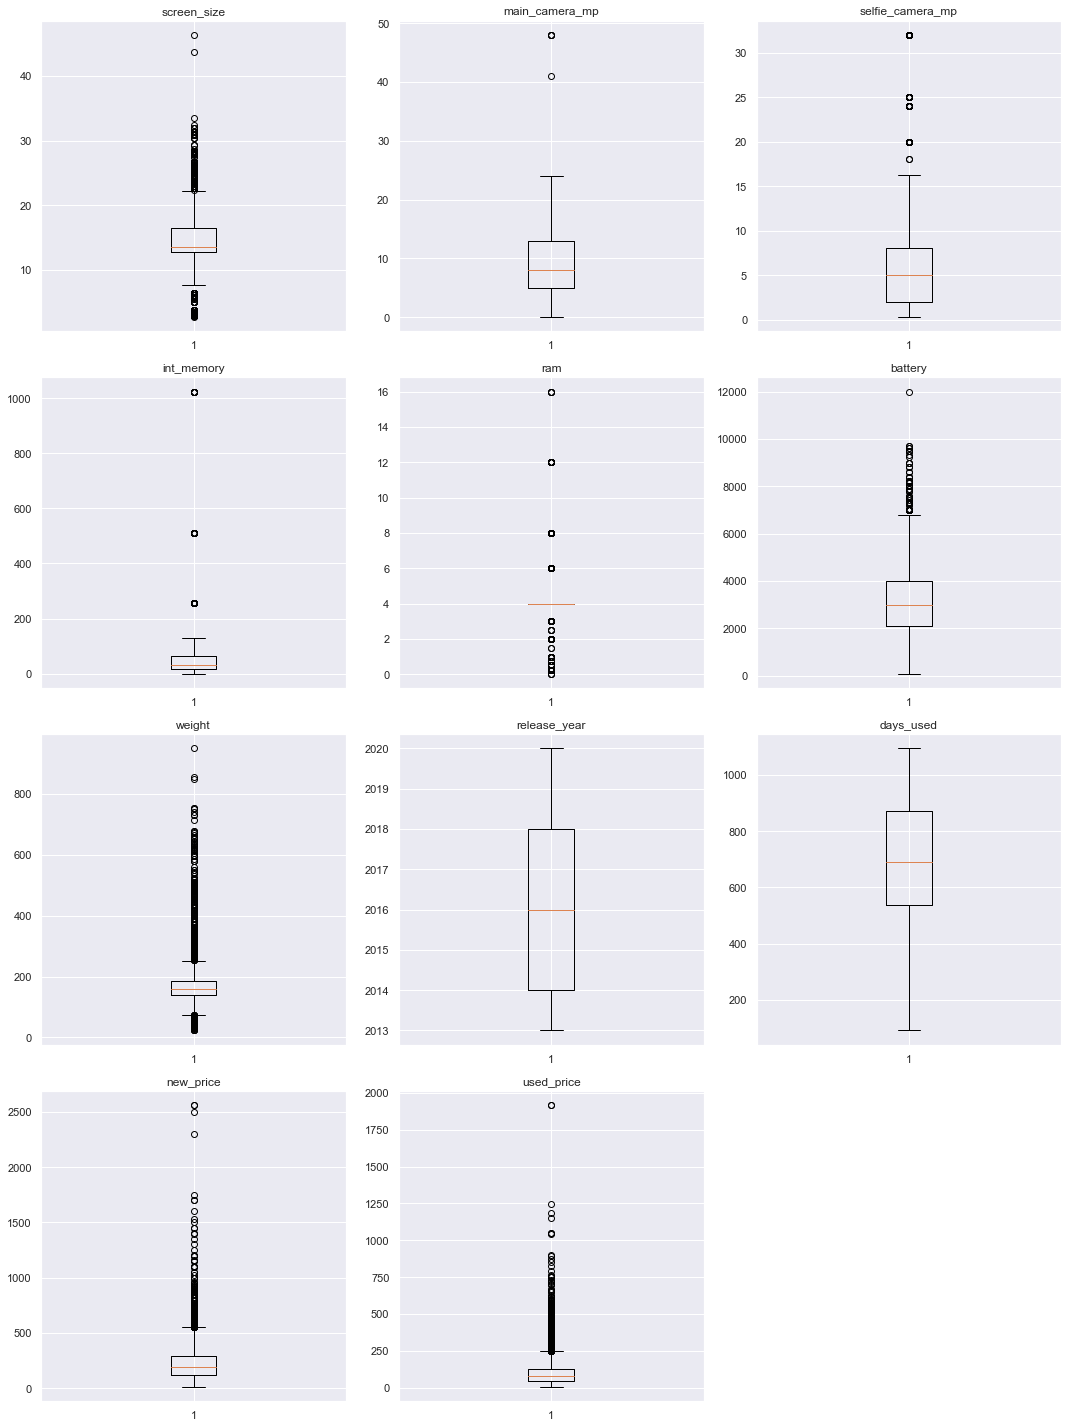

In [85]:
# plot boxplots of all columns to check for outliers
plt.figure(figsize=(15,20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observations
* There are lower outliers in *main_camera_mp*, *selfie_camera_mp*, *int_memory*, *battery*, *new_price*, *used_price*
* There are both upper and lower outliers in *screen_size*, *ram*, and *weight*
* There are no outliers in *release_year* and *days_used*
* We will treat the outliers of only the continuous numerical variable as outliers may adversely affect the predictive power of the linear model. However, these outliers may be due to non-linear pattern in the data or may contain important information
* We will build the model with and without outliers and compare the model performances

## Linear Modeling without Outlier Treatment
* Some outliers may be due to errors in the data while others are legitimate data points.
* We will try modeling without any outlier treatment and then with outlier treatment to compare model performances.

### Preparing Data for Modeling

In [86]:
# look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   brand_name            3571 non-null   category
 1   os                    3571 non-null   category
 2   screen_size           3571 non-null   float64 
 3   4g                    3571 non-null   category
 4   5g                    3571 non-null   category
 5   main_camera_mp        3571 non-null   float64 
 6   selfie_camera_mp      3571 non-null   float64 
 7   int_memory            3571 non-null   float64 
 8   ram                   3571 non-null   float64 
 9   battery               3571 non-null   float64 
 10  weight                3571 non-null   float64 
 11  release_year          3571 non-null   int64   
 12  days_used             3571 non-null   int64   
 13  new_price             3571 non-null   float64 
 14  used_price            3571 non-null   float64 
 15  bran

In [87]:
# Define X and y variables
X = df.drop(['used_price', 'brand_name', 'binned_main_cam_mp', 
              'binned_selfie_cam_mp'], axis=1)
y = df['used_price']
print(X.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        23.97  yes   no            13.0               5.0   
1  Android        28.10  yes  yes            13.0              16.0   
2  Android        24.29  yes  yes            13.0               8.0   
3  Android        26.04  yes  yes            13.0               8.0   
4  Android        15.72  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  release_year  days_used  new_price  \
0        64.0  3.0   3020.0   146.0          2020        127     111.62   
1       128.0  8.0   4300.0   213.0          2020        325     249.39   
2       128.0  8.0   4200.0   213.0          2020        162     359.47   
3        64.0  6.0   7250.0   480.0          2020        345     278.93   
4        64.0  3.0   5000.0   185.0          2020        293     140.87   

  brand_group  
0    midrange  
1    midrange  
2    midrange  
3    midrange  
4    midrange  


In [88]:
print(y.head())

0     86.96
1    161.49
2    268.55
3    180.23
4    103.80
Name: used_price, dtype: float64


In [89]:
# one-hot encoding for X categorical variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes('category').columns.tolist(),
    drop_first=True
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,brand_group_luxury,brand_group_midrange
0,23.97,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,0,0,0,1,0,0,1
1,28.10,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,0,0,0,1,1,0,1
2,24.29,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,0,0,0,1,1,0,1
3,26.04,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,0,0,0,1,1,0,1
4,15.72,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,0,0,0,1,0,0,1


In [90]:
# split data into 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [91]:
print('Number of rows in train data:', x_train.shape[0])
print('Number of rows in test data:', x_test.shape[0])

Number of rows in train data: 2499
Number of rows in test data: 1072


In [92]:
# fit the model on the train data(70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

### Check coefficients and intercept of the model

In [93]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ['Intercept'],
    columns = ['Coefficients'],
)

coef_df

,Coefficients
screen_size,-0.588007
main_camera_mp,-1.370797
selfie_camera_mp,-0.401939
int_memory,0.065204
ram,4.700021
battery,-0.000465
weight,-0.007306
release_year,2.864406
days_used,-0.106177
new_price,0.527101


### Check the performance of the model using different metrics
* We will use metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate Mean absolute percentage error (MAPE) and adjusted $R^2$.
    *  MAPE measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
* We will create a function to print out all the above metrics together

In [25]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
        r2 = r2_score(targets, predictions)
        n = predictors.shape[0]
        k = predictors.shape[1]
        return 1 - ((1-r2) * (n-1) / (n-k-1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to computer different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    
    # predicting using the independent variables
    pred = model.predict(predictors)
    
    r2 = r2_score(target, pred) # compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred) # compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred)) # compute RMSE
    mae = mean_absolute_error(target, pred) # compute MAE
    mape = mape_score(target, pred) # compute MAPE
    
    # create a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Adj. R-squared': adjr2,
            'MAPE': mape,
        },
        index=[0],
    )
    
    return df_perf

In [95]:
# checking model performance on train set (seen 70% of data)
print('Training Performance\n')
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,28.662357,16.675438,0.946396,0.946029,28.802882


In [96]:
# checking model performance on the test set (seen 30% of the data)
print('Test Performance\n')
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,26.437461,17.018645,0.94797,0.947131,26.287652


### Observations
* The training $R^2$ is 94.6%, indicating that the model explains 94.6% of the variation in the train data. So the model is not underfitting.
* MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting
* MAE indicates our current model is able to predict used price with a mean error of 17 euros on the test data
* MAPE on the test set suggests we can predict within 28.8% of the used price

## Outlier Treatment

In [97]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    df: dataframe
    col: name of the column
    function provided by GreatLearning
    """
    Q1 = df[col].quantile(0.25) #25th quantile
    Q3 = df[col].quantile(0.75) #75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    
    # all values smaller than Lower_Whisker will be assigned to value of Lower_Whisker
    # all values greater than Upper_Whisker will be assigned to value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    
    return df

def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: dataframe
    function provided by GreatLearning
    """
    for c in col_list:
        df = treat_outliers(df, c)
        
    return df

In [98]:
# make a copy of the data
df_outlier = df.copy()
# treat outliers on continuous variables
df_outlier = treat_outliers_all(df_outlier, ['new_price', 'used_price'])

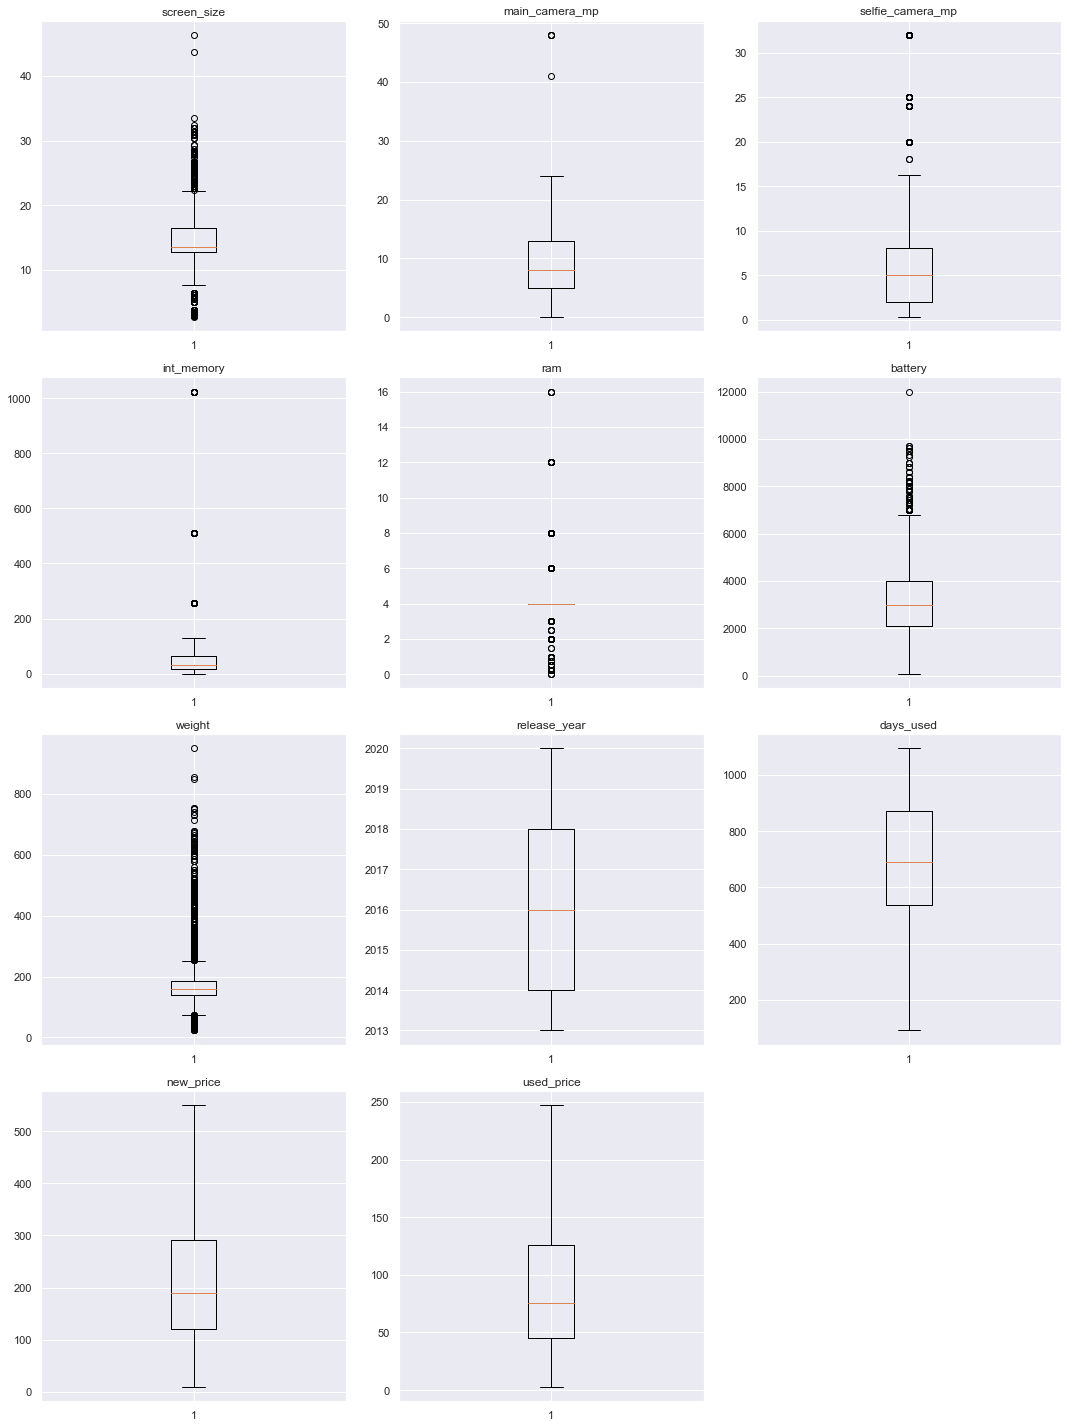

In [99]:
# look at the barplots again to see if outliers have been treated
plt.figure(figsize=(15,20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    plt.boxplot(df_outlier[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [100]:
# Define new X2 variable after outlier treatment
X2 = df_outlier.drop(['used_price', 'brand_name', 'binned_main_cam_mp', 
              'binned_selfie_cam_mp'], axis=1)
y2 = df_outlier['used_price']
print(X2.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        23.97  yes   no            13.0               5.0   
1  Android        28.10  yes  yes            13.0              16.0   
2  Android        24.29  yes  yes            13.0               8.0   
3  Android        26.04  yes  yes            13.0               8.0   
4  Android        15.72  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  release_year  days_used  new_price  \
0        64.0  3.0   3020.0   146.0          2020        127     111.62   
1       128.0  8.0   4300.0   213.0          2020        325     249.39   
2       128.0  8.0   4200.0   213.0          2020        162     359.47   
3        64.0  6.0   7250.0   480.0          2020        345     278.93   
4        64.0  3.0   5000.0   185.0          2020        293     140.87   

  brand_group  
0    midrange  
1    midrange  
2    midrange  
3    midrange  
4    midrange  


In [101]:
print(y2.head())

0     86.9600
1    161.4900
2    247.1925
3    180.2300
4    103.8000
Name: used_price, dtype: float64


In [102]:
# one-hot encoding for X categorical variables
X2 = pd.get_dummies(
    X2,
    columns=X2.select_dtypes('category').columns.tolist(),
    drop_first=True
)
X2.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,brand_group_luxury,brand_group_midrange
0,23.97,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,0,0,0,1,0,0,1
1,28.10,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,0,0,0,1,1,0,1
2,24.29,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,0,0,0,1,1,0,1
3,26.04,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,0,0,0,1,1,0,1
4,15.72,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,0,0,0,1,0,0,1


In [103]:
# split data into 70:30 ratio for train to test data
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.3, random_state=42
)

In [104]:
print('Number of rows in train data:', x_train2.shape[0])
print('Number of rows in test data:', x_test2.shape[0])

Number of rows in train data: 2499
Number of rows in test data: 1072


In [105]:
# fit the model on the train data(70% of the whole data)
linearregression2 = LinearRegression()
linearregression2.fit(x_train2, y_train2)

LinearRegression()

### Check coefficients and intercept of the model

In [106]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train2.columns.tolist() + ['Intercept'],
    columns = ['Coefficients'],
)

coef_df

,Coefficients
screen_size,-0.588007
main_camera_mp,-1.370797
selfie_camera_mp,-0.401939
int_memory,0.065204
ram,4.700021
battery,-0.000465
weight,-0.007306
release_year,2.864406
days_used,-0.106177
new_price,0.527101


### Check the performance of the model using different metrics

In [107]:
# checking model performance on train set (seen 70% of data)
print('Training Performance\n')
linearregression_train_perf2 = model_performance_regression(
    linearregression2, x_train2, y_train2
)
linearregression_train_perf2

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.210769,10.394877,0.953512,0.953194,19.078249


In [108]:
# checking model performance on test set (seen 30% of data)
print('Test Performance\n')
linearregression_test_perf2 = model_performance_regression(
    linearregression2, x_test2, y_test2
)
linearregression_test_perf2

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.006935,10.202694,0.955807,0.955095,16.545538


### Observations
* The training $R^2$ is 95.4%, indicating that the model explains 95.4% of the variation in the train data, so the model is not underfitting
* MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting
* MAE indicates that our current model is able to predict used price within a mean error of 10.2 euros on the test data
* MAPE on the test set suggest we can predict within 16.5% of the used price, which is a low but acceptable accuracy

## Linear Regression using statsmodels
* Let's build a linear regression model with data without the log transformation using statsmodels

In [109]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train3 = sm.add_constant(x_train2)
# add constant to the test data
x_test3 = sm.add_constant(x_test2)
olsmod0 = sm.OLS(y_train2, x_train3).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2993.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:25:50   Log-Likelihood:                -10178.
No. Observations:                2499   AIC:                         2.039e+04
Df Residuals:                    2481   BIC:                         2.050e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  219.8067 

### Notes
* Negative coefficients show that *used_price* decreases with the increase of the corresponding attribute value
    * *screen_size*, *main_camera_mp*, *selfie_camera_mp*, *battery*, *days_used*, *os_Others*, *os_Windows*, *4g_yes*, *brand_group_luxury*, *brand_group_midrange*
* Positive coefficients show that *used_price* increases with the increase of the corresponding attribute value
    * *int_memory*, *ram*, *weight*, *release_year*, *new_price*, *os_iOS*, *5g_yes*, 
* $p$-value of a variable indicates whether the variable is significant or not. Considering a significance level of 0.05 (5%), any variable with a $p$-value less than 0.05 would be considered significant.
* These variables might contain multicollinearity, however, which will affect the $p$-values
* We must deal with multicollinearity and check other assumptions of linear regression first, and then look at the $p$-values

## Checking Linear Regression Assumptions
In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied. We will check:
1. No multicollinearity
2. Linearity of variables
3. Independence of error terms
4. Normality of error terms
5. No heteroscedasticity

### Test for Multicollinearity
* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that he model suggests are unreliable.
* There are different ways of detecting multicollinearity. One such way is Variance Inflation Factor (VIF)
    * **VIF**: Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    * If VIF is 1, then there is no correlation among the $k^{\text{th}}$ predictor and the remaining predictor variables. Hence, the variance of $\beta_k$ is not inflated at all
    * **General rule of thumb**:
        * If VIF is between 1 and 5, then there is low multicollinearity.
        * If VIF is between 5 and 10, we say there is moderate multicollinearity.
        * If VIF exceeds 10, it shows signs of high multicollinearity.

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif['feature'] = predictors.columns
    
    # calculating VIF for each feature
    vif['VIF'] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [111]:
# check VIF
checking_vif(x_train3)

,feature,VIF
0,const,3.236911e+06
1,screen_size,3.061349e+00
2,main_camera_mp,1.838826e+00
3,selfie_camera_mp,2.659117e+00
4,int_memory,1.213376e+00
5,ram,1.713251e+00
6,battery,4.059348e+00
7,weight,3.346740e+00
8,release_year,4.205774e+00
9,days_used,2.556308e+00


**The above predictors have no multicollinearity and the assumption is satisfied.**|

In [112]:
# print OLS regression results
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2993.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:25:50   Log-Likelihood:                -10178.
No. Observations:                2499   AIC:                         2.039e+04
Df Residuals:                    2481   BIC:                         2.050e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  219.8067 

## $p$-value
* *battery, weight, os_Others, os_Windows, brand_group_luxury, brand_group_midrange* have $p$-value > 0.05 so they are not significant and we will drop them
* Rather than dropping all variables at once, we will proceed in a systematic way because $p$-values may change after dropping a variable. We will follow the steps:
    * Build a model, check the $p$-values of the variables, and drop the column with the highest $p$-value
    * Create a new model without the dropped feature, check $p$-values of the variables, and drop the column with the highest $p$-value
    * Repeat the above steps until there are no columns with $p$-value > 0.05.

The above process can also be done efficiently using a loop.

In [113]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # define training set
    x_train_aux = x_train3[cols]
    
    # fit the model
    model = sm.OLS(y_train2, x_train_aux).fit()
    
    # get p-values and max p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    
    # name of variable with max p-value
    feature_with_p_max = p_values.idxmax()
    
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'days_used', 'new_price', 'os_Others', 'os_iOS', '4g_yes']


In [114]:
# narrow down variables with just the significant factors
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

In [115]:
# print OLS regression results
olsmod1 = sm.OLS(y_train2, x_train4).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     5662.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:25:50   Log-Likelihood:                -10181.
No. Observations:                2499   AIC:                         2.038e+04
Df Residuals:                    2489   BIC:                         2.044e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               62.6193      1.801  

**Now no feature has $p$-value $\geq$ 0.05, so we'll consider the features in x_train4 as the final ones and olsmod1 as final model.**

### Observations
* Adjusted R-squared is 0.953, i.e., our model explains ~95% of the variance. This shows that the model is quite good.
* The adjusted R-squared in olsmod0 (where we considered all the variables) was 0.750. This shows that the variables we dropped greatly improved the model.

**Now we will check the rest of the assumptions on olsmod1.**

2. Linearity of variables
3. Independence of error terms
4. Normality of error terms
5. No heteroscedasticity

## Test for Linearity and Independence
**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**
* Make a plot of fitted values vs residuals.
* If they don't follow any pattern, then we say the model is linear and residuals are independent.
* Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**
* We can try to transform the variables and make the relationships linear.

In [116]:
# create a dataframe with actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred['Actual Values'] = y_train2 # actual values
df_pred['Fitted Values'] = olsmod1.fittedvalues # predicted values
df_pred['Residuals'] = olsmod1.resid # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
844,100.48,100.902990,-0.422990
1539,111.68,117.369674,-5.689674
3452,113.89,111.560888,2.329112
1727,64.09,71.338199,-7.248199
1926,67.95,67.565502,0.384498


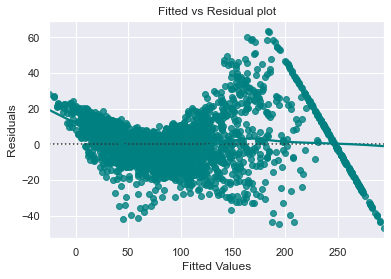

In [117]:
# plot the fitted values vs residuals
sns.residplot(
    data = df_pred, x='Fitted Values', y='Residuals', color='teal', lowess=True
)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual plot')
plt.show()

* The scatterplot shows the distribution of residuals (errors) vs fitted values (predicted values)
* If there exists a pattern in this plot, we would consider it as signs of non-linearity in the data a and a pattern means that the model does not capture nonlinear effects.
* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

## Test for Normality
**Why the test?**
* Residuals should be normally distributed. Otherwise, confidence intervals of the coefficient estimates may become to wide or narror. Once confidence interval becomes unstable it leads to difficulty in estimating coefficients based on minimization of least squares. Non-nomrality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**
* The shape of the histogram of residuals can give an initial ideal about the normality.
* It can also be checked usin ga Q-Q plot of residuals. If the residuals follow a normal distribution, they make a straight line plot. Otherwise, not.
* Other tests to check for normality include the Shapiro-Wilk test
    * Null hypothesis: Residuals are normally distributed
    * Alternate hypothesis: Residuals are not normally distributed
   
**How to fix if this assumption is not followed?**
* We can apply transformations like log, exponential, arcsinh, etc., as per our data

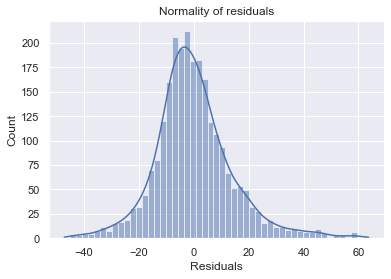

In [118]:
# plot residuals
sns.histplot(data=df_pred, x='Residuals', kde=True)
plt.title('Normality of residuals')
plt.show()

* The histogram of residuals is approximately normal in shape.
* Check the Q-Q plot

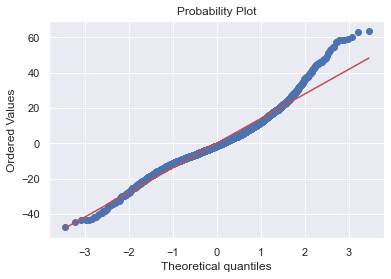

In [119]:
import pylab
import scipy.stats as stats

# Q-Q plot of residuals
stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab)
plt.show()

* The residuals more or less follow a straight line except at the tail
* Check the results of the Shapiro-Wilk test

In [120]:
# shapiro-wilk test
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9612674117088318, pvalue=2.5080180803981764e-25)

* Since $p$-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test
* Strictly speaking, the residuals are not normal
* However, as an approximation, we can accept this distribution as close to being normal
* **So the assumption is satisfied**

## Test for Homoscedasticity
* **Homoscedascticity**: If the variance of the residuals is symmetrically distributed across the regression line
* **Heteroscedasticity**: If the variance is unequal for the residuals across the regression line

**Why the test?**
* The presence of non-constant variance in the error terms results in heteroscedasticity
* Generally, non-constant variance arises in presence of outliers

**How to check for homoscedasticity?**
* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of *heteroscedasticity*, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a $p$-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, heteroscedastic.
    * Null hypothesis: Residuals are homoscedastic
    * Alternate hypothesis: Results have heteroscedasticity

**How to fix if this assumption is not followed?**
* Heteroscedasticity can be fixed by adding other important features or making transformations

In [121]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# check Goldfeld-Quant test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(df_pred['Residuals'], x_train4)
lzip(name, test)

[('F statistic', 1.058119016180659), ('p-value', 0.1600620594814754)]

* **Since $p$-value > 0.05, we can say the residuals are homoscedastic. So this assumption is satisfied.**
* Now we have checked all assumptions of linear regression and they are satisfied, we can move towards the prediction part.

In [122]:
# predictions on the test set
pred = olsmod1.predict(x_test4)

df_pred_test = pd.DataFrame({'Actual': y_test2, 'Predicted': pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2098,30.5200,22.856080
278,195.6700,195.758587
26,247.1925,218.767265
2910,89.9700,90.793155
2631,69.2000,64.782051
1582,89.5800,110.267631
2110,247.1925,269.642020
3160,65.3400,65.685886
2817,115.7700,106.616685
549,39.2900,48.146529


* We can observe here that our model has returned decent prediction results, and the actual and predicted values are somewhat comparable
* We can also visualize comparison result as a bar graph

**Note**: As the number of records is large, we will take 25 random records for representation purpose only

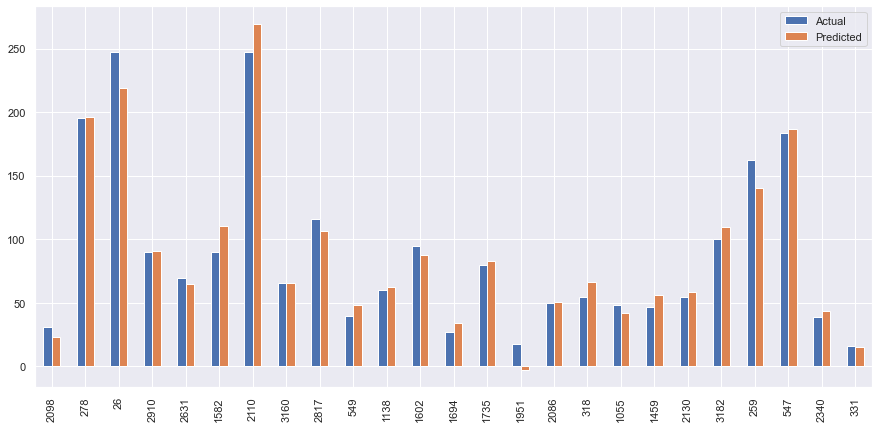

In [123]:
# plot sample of comparison between actual and predicted data using our model
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind='bar', figsize=(15,7))
# plt.savefig('.jpg', bbox_inches='tight')
plt.show()

In [124]:
# checking model performance on train set (seen 70% data)
print('Training Performance\n')
olsmod1_train_perf = model_performance_regression(olsmod1, x_train4, y_train2)
olsmod1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.223484,10.402615,0.953429,0.953242,19.122228


In [125]:
# checking model performance on test set (seen 30% data)
print('Test Performance\n')
olsmod1_test_perf = model_performance_regression(olsmod1, x_test4, y_test2)
olsmod1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.97722,10.15559,0.955995,0.95558,16.521149


* The model is able to explain ~95% of the variation in the data, which is quite good
* The train and test RMSE and MAE are somewhat low and comparable. So our model is not overfitting
* The MAPE on the test set suggests we can predict within 16.5% of the used price
* Hence, we can conclude the model *olsmod1* is decent for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model**

In [126]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf2.T, olsmod1_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    'Linear Regression sklearn',
    'Linear Regression statsmodels',
]

print('Training performance comparison:')
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,14.210769,14.223484
MAE,10.394877,10.402615
R-squared,0.953512,0.953429
Adj. R-squared,0.953194,0.953242
MAPE,19.078249,19.122228


In [127]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf2.T, olsmod1_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    'Linear Regression sklearn',
    'Linear Regression statsmodels',
]

print('Test performance comparions:')
models_test_comp_df

Test performance comparions:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,14.006935,13.977220
MAE,10.202694,10.155590
R-squared,0.955807,0.955995
Adj. R-squared,0.955095,0.955580
MAPE,16.545538,16.521149


* The two models have very similar performance.

## <font color='turquoise'>Log Transformation</font>

*new_price* and *used_price* are very skewed and will likely behave better on the log scale. This may be a better than outlier treatment.

In [26]:
# create a copy of the original data
df_log = df.copy()
# check dataset
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   brand_name            3571 non-null   category
 1   os                    3571 non-null   category
 2   screen_size           3571 non-null   float64 
 3   4g                    3571 non-null   category
 4   5g                    3571 non-null   category
 5   main_camera_mp        3571 non-null   float64 
 6   selfie_camera_mp      3571 non-null   float64 
 7   int_memory            3571 non-null   float64 
 8   ram                   3571 non-null   float64 
 9   battery               3571 non-null   float64 
 10  weight                3571 non-null   float64 
 11  release_year          3571 non-null   int64   
 12  days_used             3571 non-null   int64   
 13  new_price             3571 non-null   float64 
 14  used_price            3571 non-null   float64 
 15  bran

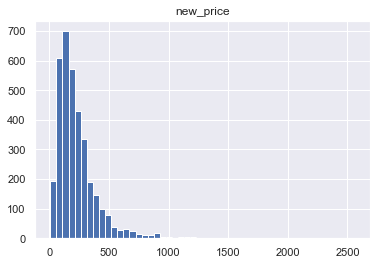

0


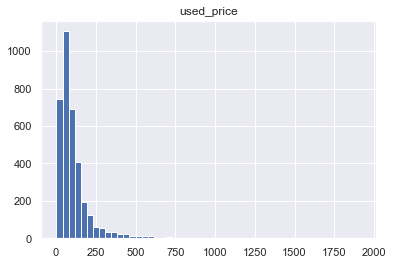

0


In [9]:
# inspect skewed data that may need log transformation
cols_to_log = ['new_price', 'used_price']
for colname in cols_to_log:
    plt.hist(df_log[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df_log[colname] <= 0))

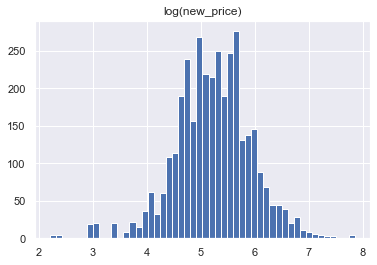

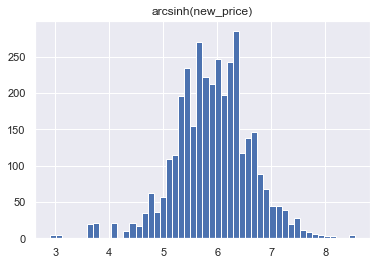

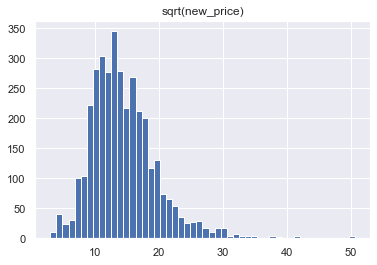

In [10]:
# plot different transformations of new_price to determine which is best
plt.hist(np.log(df_log['new_price']), 50) # log transformation
plt.title('log(new_price)')
plt.show()

plt.hist(np.arcsinh(df_log['new_price']), 50) # inverse hyperbolic sine transformation
plt.title('arcsinh(new_price)')
plt.show()

plt.hist(np.sqrt(df_log['new_price']), 50) # square root transformation
plt.title('sqrt(new_price)')
plt.show()

All three have helped but the sqrt is not quite strong enough and the result is still a bit skewed, so I prefer the log or arcsinh. The log and arcsinh look similar so the difference there is more be about interpretation. It will likely be easier to explain the log of a number to someone than the arcsinh of a number since that's a less known transformation, so choose log(new_price).

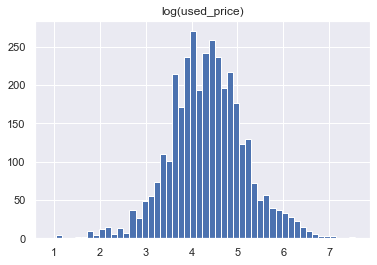

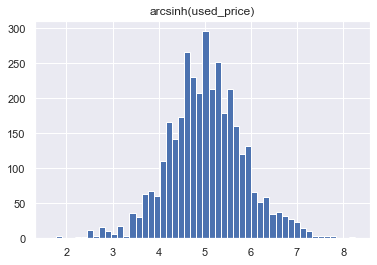

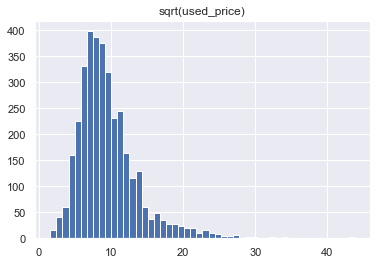

In [11]:
# plot different transformations of used_price to determine which is best
plt.hist(np.log(df_log['used_price']), 50) # log transformation
plt.title('log(used_price)')
plt.show()

plt.hist(np.arcsinh(df_log['used_price']), 50) # inverse hyperbolic sine transformation
plt.title('arcsinh(used_price)')
plt.show()

plt.hist(np.sqrt(df_log['used_price']), 50) # square root transformation
plt.title('sqrt(used_price)')
plt.show()

Again, all three have helped but the sqrt is not quite strong enough and the result is still a bit skewed, so I prefer the log or arcsinh. The log and arcsinh look similar so the difference there is more be about interpretation. It will likely be easier to explain the log of a number to someone than the arcsinh of a number since that's a less known transformation, so choose log(used_price).

In [27]:
# apply log transformations for new_price and used_price
for colname in cols_to_log:
    df_log[colname + '_log'] = np.log(df_log[colname])

# drop original new_price and used_price columns
df_log.drop(cols_to_log, axis=1, inplace=True)

# drop brand_name column
df_log.drop('brand_name', axis=1, inplace=True)
df_log.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,brand_group,binned_main_cam_mp,binned_selfie_cam_mp,new_price_log,used_price_log
0,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,midrange,excellent,good,4.715100,4.465448
1,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,midrange,excellent,excellent,5.519018,5.084443
2,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,midrange,excellent,good,5.884631,5.593037
3,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,midrange,excellent,good,5.630961,5.194234
4,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,midrange,excellent,good,4.947837,4.642466


In [28]:
# Define X and y variables for dataframe with log transformations
X_log = df_log.drop(['used_price_log', 'binned_main_cam_mp', 'binned_selfie_cam_mp'], axis=1)
y_log = df_log['used_price_log']
print(X_log.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        23.97  yes   no            13.0               5.0   
1  Android        28.10  yes  yes            13.0              16.0   
2  Android        24.29  yes  yes            13.0               8.0   
3  Android        26.04  yes  yes            13.0               8.0   
4  Android        15.72  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  release_year  days_used brand_group  \
0        64.0  3.0   3020.0   146.0          2020        127    midrange   
1       128.0  8.0   4300.0   213.0          2020        325    midrange   
2       128.0  8.0   4200.0   213.0          2020        162    midrange   
3        64.0  6.0   7250.0   480.0          2020        345    midrange   
4        64.0  3.0   5000.0   185.0          2020        293    midrange   

   new_price_log  
0       4.715100  
1       5.519018  
2       5.884631  
3       5.630961  
4       4.947837  


In [29]:
print(y_log.head())

0    4.465448
1    5.084443
2    5.593037
3    5.194234
4    4.642466
Name: used_price_log, dtype: float64


In [30]:
# one-hot encoding for X-variables
X_log = pd.get_dummies(
    X_log,
    columns=X_log.select_dtypes('category').columns.tolist(),
    drop_first=True,
)
X_log.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price_log,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,brand_group_luxury,brand_group_midrange
0,23.97,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,0,0,0,1,0,0,1
1,28.10,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,0,0,0,1,1,0,1
2,24.29,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,0,0,0,1,1,0,1
3,26.04,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,0,0,0,1,1,0,1
4,15.72,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,0,0,0,1,0,0,1


In [31]:
# split data into 70:30 ratio for train to test data
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.3, random_state=42
)

In [32]:
print('Number of rows in train data:', x_train_log.shape[0])
print('Number of rows in test data:', x_test_log.shape[0])

Number of rows in train data: 2499
Number of rows in test data: 1072


In [33]:
# fit the model on the train data (70% of the whole data)
linearregression_log = LinearRegression()
linearregression_log.fit(x_train_log, y_train_log)

LinearRegression()

### Check coefficients and intercept of the model

In [34]:
coef_df_log = pd.DataFrame(
    np.append(linearregression_log.coef_, linearregression_log.intercept_),
    index=x_train_log.columns.tolist() + ['Intercept'],
    columns=['Coefficients'],
)

coef_df_log

,Coefficients
screen_size,0.000255
main_camera_mp,0.000133
selfie_camera_mp,0.000651
int_memory,0.000016
ram,-0.000543
battery,0.000002
weight,-0.000015
release_year,0.004819
days_used,-0.001109
new_price_log,0.995939


### Check the performance of the model

In [35]:
# function to compute different metrics to check performance of 
# a regression model with log transformation on target variable
def model_performance_regression_log(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance (with log transformation)
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    
    # predicting using the independent variables 
    pred = np.exp(model.predict(predictors)) # exponential transformation to revert to original scale
    target = np.exp(target) # exponential transformation to revert to original scale
    
    r2 = r2_score(target, pred) # compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred) # compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred)) # compute RMSE
    mae = mean_absolute_error(target, pred) # compute MAE
    mape = mape_score(target, pred) # compute MAPE
    
    # create a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Adj. R-squared': adjr2,
            'MAPE': mape,
        },
        index=[0],
    )
    
    return df_perf

In [36]:
# checking model performance on train set
print('Training Performance\n')
linearregression_train_log_perf = model_performance_regression_log(
    linearregression_log, x_train_log, y_train_log
)

linearregression_train_log_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,11.366426,7.028054,0.99157,0.991512,6.987805


In [37]:
# checking model performance on test set
print('Test Performance\n')
linearregression_test_log_perf = model_performance_regression_log(
    linearregression_log, x_test_log, y_test_log
)

linearregression_test_log_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,11.583073,7.298113,0.990012,0.989851,7.073606


### Observations
* The training $R^2$ is 99%, indicating that the model explains 99%. So the model isn't underfitting.
* MAE and RMSE on the train and test sets are comparable, which shows the model is not overfitting.
* MAE indicates that our current model is able to predict used price within a mean error of ~7.3 euros on the test data
* MAPE on the test set suggests we can predict within 7.1% of the used price

## Linear Regression using statsmodels with log transformed data
* Let's build a linear regression model with data with log transformation using statsmodels

In [38]:
# add the constant manually
x_train_log2 = sm.add_constant(x_train_log)
# add constant to the test data
x_test_log2 = sm.add_constant(x_test_log)
olsmod_log = sm.OLS(y_train_log, x_train_log2).fit()
print(olsmod_log.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.461e+04
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:09:30   Log-Likelihood:                 2661.2
No. Observations:                2499   AIC:                            -5286.
Df Residuals:                    2481   BIC:                            -5181.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -9.8306 

In [39]:
# check VIF
checking_vif(x_train_log2)

NameError: name 'checking_vif' is not defined

**The above predictors have no multicollinearity and the assumption is satisfied.**|

## $p$-value
* *screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, os_Others, os_Windows, os_iOS, brand_group_luxury, brand_group_midrange* have $p$-value > 0.05 so they are not significant and we will drop them
* Rather than dropping all variables at once, we will proceed in a systematic way because $p$-values may change after dropping a variable. We will follow the steps:
    * Build a model, check the $p$-values of the variables, and drop the column with the highest $p$-value
    * Create a new model without the dropped feature, check $p$-values of the variables, and drop the column with the highest $p$-value
    * Repeat the above steps until there are no columns with $p$-value > 0.05.

The above process can also be done efficiently using a loop.

In [40]:
# initial list of columns
cols = x_train_log2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # define training set
    x_train_aux = x_train_log2[cols]
    
    # fit the model
    model = sm.OLS(y_train_log, x_train_aux).fit()
    
    # get p-values and max p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    
    # name of variable with max p-value
    feature_with_p_max = p_values.idxmax()
    
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'release_year', 'days_used', 'new_price_log', '4g_yes', '5g_yes']


In [41]:
# narrow down variables with just the significant factors
x_train_log3 = x_train_log2[selected_features]
x_test_log3 = x_test_log2[selected_features]

In [43]:
# print OLS regression results
olsmod_log2 = sm.OLS(y_train_log, x_train_log3).fit()
print(olsmod_log2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.968e+04
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:10:52   Log-Likelihood:                 2655.8
No. Observations:                2499   AIC:                            -5300.
Df Residuals:                    2493   BIC:                            -5265.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -12.9251      2.655     -4.869

**Now no feature has $p$-value > 0.05 so we'll consider the features in *x_train_log3* as the final ones and *olsmod_log2* as final model**

### Observations
* Adjusted $R^2$ is 0.99, i.e., our model is able to explain ~99% of the variance. This shows the model is very good.
* The adjusted $R^2$ in *olsmod_log* was 0.99, which shows that the variables we dropped did not affec the model much.

### Check assumptions on olsmod_log2

In [148]:
# check VIF
checking_vif(x_train_log3)

,feature,VIF
0,const,2.513334e+06
1,release_year,3.257568e+00
2,days_used,2.446705e+00
3,new_price_log,1.401414e+00
4,4g_yes,1.925431e+00
5,5g_yes,1.260972e+00


**The above predictors have no multicollinearity and the assumption is satisfied.**|

In [44]:
# create a dataframe with actual, fitted, and residual values
df_pred_log = pd.DataFrame()

df_pred_log['Actual Values'] = y_train_log # actual values
df_pred_log['Fitted Values'] = olsmod_log2.fittedvalues # predicted values
df_pred_log['Residuals'] = olsmod_log2.resid # residuals

df_pred_log.sample(n=10)

,Actual Values,Fitted Values,Residuals
1265,4.639475,4.567045,0.072430
597,4.703657,4.730999,-0.027342
1660,3.036394,3.047272,-0.010878
395,3.913222,4.000489,-0.087267
641,4.704744,4.645974,0.058770
699,5.634111,5.693829,-0.059718
447,3.509753,3.475045,0.034708
3484,4.106602,4.027673,0.078930
2483,4.275693,4.265354,0.010339
1773,4.273745,4.222966,0.050779


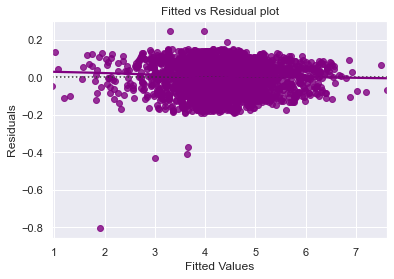

In [45]:
# plot the fitted values vs residuals

sns.residplot(
    data=df_pred_log, x='Fitted Values', y='Residuals', color='purple', lowess=True
)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual plot')
plt.show()

**We see no pattern in this plot. Hence, the assumptions of linearity and independence are satisfied**

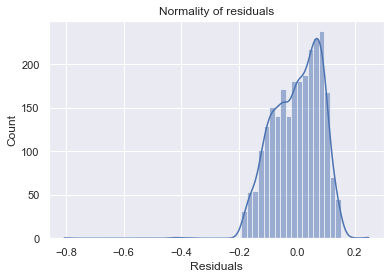

In [46]:
# visualize the residuals with a histogram
sns.histplot(data=df_pred_log, x='Residuals', kde=True)
plt.title('Normality of residuals')
plt.show()

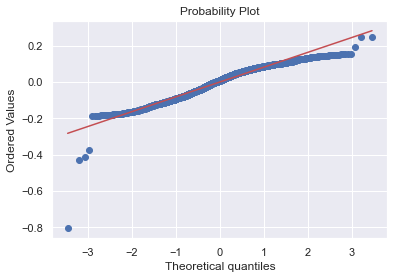

In [48]:
import pylab
import scipy.stats as stats
# check the Q-Q plot
stats.probplot(df_pred_log['Residuals'], dist='norm', plot=pylab)
plt.show()

In [49]:
# check the Shapiro-Wilk test
stats.shapiro(df_pred_log['Residuals'])

ShapiroResult(statistic=0.9562034606933594, pvalue=8.935189428497274e-27)

* The residuals have a bell shape
* The residuals more or less follow a straight line except for the tails
* Since $p<0.05$, the residuals are not normal
* However, as an approximation, we accept the distribution as close to normal
* **So the assumption of normality of error terms is satisfied**

In [50]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
# check Goldfeld-Quant test
name_log = ['F statistic', 'p-value']
test_log = sms.het_goldfeldquandt(df_pred_log['Residuals'], x_train_log3)
lzip(name_log, test_log)

[('F statistic', 1.0825218432963812), ('p-value', 0.08111308686264307)]

* Since $p<0.05$, we can say the residuals are heteroskedastic.
* However, the model seems to work fine for most of the data. Heteroskedasticity may be due to limited data 
* **So we accept the distribution as homoskedastic**

In [155]:
# predictions on the test set
pred_log = olsmod_log2.predict(x_test_log3)

df_pred_log_test = pd.DataFrame({'Actual': np.exp(y_test_log), 'Predicted': np.exp(pred_log)})
df_pred_log_test.sample(10, random_state=1)

,Actual,Predicted
2098,30.52,30.634020
278,195.67,196.470969
26,314.66,300.103449
2910,89.97,86.291992
2631,69.20,64.383070
1582,89.58,103.820868
2110,431.78,400.004777
3160,65.34,60.070986
2817,115.77,104.322718
549,39.29,42.701260


* Our model has returned good prediction results and the actual values are comparable to the predicted values

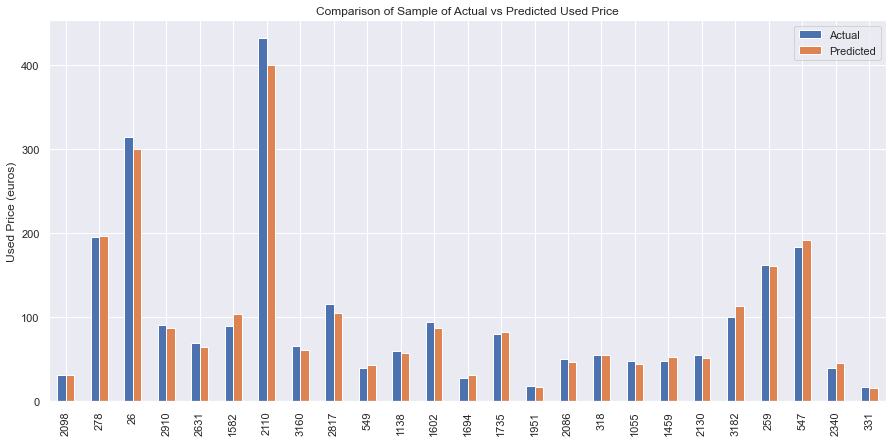

In [156]:
# visualize the comparison as a bar graph
df2 = df_pred_log_test.sample(25, random_state=1)
df2.plot(kind='bar', figsize=(15,7))
plt.title('Comparison of Sample of Actual vs Predicted Used Price')
plt.ylabel('Used Price (euros)')
plt.savefig('pred_test_sample.jpg', bbox_inches='tight')
plt.show()

In [157]:
# checking model performance on train set
print('Training Performance\n')
olsmod_log2_train_perf = model_performance_regression_log(olsmod_log2, x_train_log3, y_train_log)
olsmod_log2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,11.329552,7.022132,0.991625,0.991605,7.005776


In [158]:
# checking model performance on test set
print('Test Performance\n')
olsmod_log2_test_perf = model_performance_regression_log(olsmod_log2, x_test_log3, y_test_log)
olsmod_log2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,11.557044,7.291537,0.990057,0.990001,7.07044


* The model is able to explain ~99% of the variation in the data, which is excellent.
* The train and test RMSE and MAE are low and comparable. Our model is not overfitting
* The MAPE on the test set suggests we can predict within 7.1% of the used price
* Hence, we can conclude the model *olsmod_log2* is good for prediction as well as inference purposes.

In [159]:
# compare log model created with sklearn and log model created with statsmodels

# training performance comparison
models_log_train_comp_df = pd.concat(
    [linearregression_train_log_perf.T, olsmod_log2_train_perf.T],
    axis=1,
)

models_log_train_comp_df.columns = [
    'Linear Regression sklearn',
    'Linear Regression statsmodels',
]

print('Training performance comparison:')
models_log_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,11.366426,11.329552
MAE,7.028054,7.022132
R-squared,0.991570,0.991625
Adj. R-squared,0.991512,0.991605
MAPE,6.987805,7.005776


In [160]:
# test performance comparison
models_log_test_comp_df = pd.concat(
    [linearregression_test_log_perf.T, olsmod_log2_test_perf.T],
    axis=1,
)

models_log_test_comp_df.columns = [
    'Linear Regression sklearn',
    'Linear Regression statsmodels',
]

print('Test performance comparison:')
models_log_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,11.583073,11.557044
MAE,7.298113,7.291537
R-squared,0.990012,0.990057
Adj. R-squared,0.989851,0.990001
MAPE,7.073606,7.070440


* The two models perform comparably

## Final Model Summary

**Let's recreate the final statsmodels model and print its summary to gain insights.**

In [161]:
# final statsmodels model
olsmodel_final = sm.OLS(y_train_log, x_train_log3).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.968e+04
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:26:00   Log-Likelihood:                 2655.8
No. Observations:                2499   AIC:                            -5300.
Df Residuals:                    2493   BIC:                            -5265.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -12.9251      2.655     -4.869

In [162]:
# print coefficients
print(olsmodel_final.params)

const           -12.925069
release_year      0.006349
days_used        -0.001111
new_price_log     1.000773
4g_yes           -0.010437
5g_yes            0.024723
dtype: float64


## Conclusions
1. As new price increases by 1 euro, the used price also **increases** ~0.9%
2. With each increase of 1 year for release year, used price **increases** ~0.6%
3. As days used increases, used price **decreases** ~0.1%
4. Phones with 4g cost ~1% **less** than those that do not have 4g
5. Phones with 5g cost ~2.4% **more** than those that do not have 5g

## Actionable Insights and Recommendations

**The factors that influence used price the most are the release year, number of days used, new price, and availability of 4g or 5g.**
* For any given new price, newer phones tend to have higher used price
* Newer phones have higher used price
    * Newer phones are more likely to have 5g (although not many do yet), which results in higher new and used price
* For any given release year, the more a phone is used, the lower its used price
* More data should be collected, as it may impact our model
    * As we continue to collect more data, we will very likely collect more data on more current phones, phones with more days used, and more phones with 4g and/or 5g available
    * There is not as much data for luxury phones
    * Not many basic lightweight phones with large battery capacity in our data
    * As technology improves, phones are likely to become lighter, phone cameras are likely to become cheaper, and phone batteries may be improved upon
    * Cameras (both main and selfie) take vastly different quality photos, even with the same megapixels
    * Some phones even offer multiple lenses on the back of the phone
    * There may be specifications of the phone that have some impact on pricing that are not currently measured
        * color(s) available
        * material
        * thickness
        * networks
        * SIM
        * display type
        * resolution
        * camera lenses/sensors
        * speakers
        * 3.5 mm jack
        * bluetooth
        * USB
        * battery type
        * fast charging